### IMPORT DES PACKAGES


In [1]:
import pandas as pd
import numpy as np

    
import missingno as msno
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import math
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from sklearn.impute import KNNImputer


### IMPORT DU FICHIER ET OBSERVATIONS GENERALES


In [3]:
df = pd.read_csv('foodfacts.csv',sep='\t')
df

C:\Users\emili\AppData\Local\Temp\ipykernel_17272\1276132335.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('foodfacts.csv',sep='\t')


code                                                url  \
0                3087  http://world-fr.openfoodfacts.org/produit/0000...   
1                4530  http://world-fr.openfoodfacts.org/produit/0000...   
2                4559  http://world-fr.openfoodfacts.org/produit/0000...   
3               16087  http://world-fr.openfoodfacts.org/produit/0000...   
4               16094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
0           1474103893   2016-09-17T09:18:13Z   
1           1489069957   2017-03-09T14:32:37Z   
2           1489069957   2017-03-09T14:32:37Z   
3           1489055731   2017-03-09T10:35:31Z   
4           1489055653   2017-03-09T10:34:13Z   
...                ...                    ...   
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ... ph_100g  \
0                                   NaN      1kg  ...     NaN   
1                                   NaN      NaN  ...     NaN   
2                                   NaN      NaN  ...     NaN   
3                                   NaN      NaN  ...     NaN   
4                                   NaN      NaN  ...     NaN   
...                                 ...      ...  ...     ...   
320767                              NaN        1  ...     NaN   
320768                              NaN      NaN  ...     NaN   
320769  Leba pickle flavor potato chips     50 g  ...     NaN   
320770                              NaN      67g  ...     NaN   
320771                              NaN      NaN  ...     NaN   

       fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g  \
0                              NaN                              N

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [5]:
df.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

In [6]:
df.isna().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [7]:
for i in df.columns:
    sum_nan =sum(df[i].isna())
    sum_rows =len(df)
    nan_percent = sum_nan/sum_rows*100
    print("percentage of nan in the feature {} is {} percent".format(i,nan_percent))

percentage of nan in the feature code is 0.007170201887945333 percent
percentage of nan in the feature url is 0.007170201887945333 percent
percentage of nan in the feature creator is 0.0006234958163430723 percent
percentage of nan in the feature created_t is 0.0009352437245146086 percent
percentage of nan in the feature created_datetime is 0.0028057311735438253 percent
percentage of nan in the feature last_modified_t is 0.0 percent
percentage of nan in the feature last_modified_datetime is 0.0 percent
percentage of nan in the feature product_name is 5.537266344942825 percent
percentage of nan in the feature generic_name is 83.54126918808375 percent
percentage of nan in the feature quantity is 67.32289601336775 percent
percentage of nan in the feature packaging is 75.3843851707755 percent
percentage of nan in the feature packaging_tags is 75.38407342286733 percent
percentage of nan in the feature brands is 8.857381566969686 percent
percentage of nan in the feature brands_tags is 8.85987

percentage of nan in the feature alcohol_100g is 98.71154589552704 percent
percentage of nan in the feature vitamin-a_100g is 57.117828239372514 percent
percentage of nan in the feature beta-carotene_100g is 99.98940057112216 percent
percentage of nan in the feature vitamin-d_100g is 97.79999501203346 percent
percentage of nan in the feature vitamin-e_100g is 99.58225780305014 percent
percentage of nan in the feature vitamin-k_100g is 99.71381542029853 percent
percentage of nan in the feature vitamin-c_100g is 56.08500741960022 percent
percentage of nan in the feature vitamin-b1_100g is 96.52276383225468 percent
percentage of nan in the feature vitamin-b2_100g is 96.62844637312483 percent
percentage of nan in the feature vitamin-pp_100g is 96.34350878505606 percent
percentage of nan in the feature vitamin-b6_100g is 97.8851021909643 percent
percentage of nan in the feature vitamin-b9_100g is 98.36644096118114 percent
percentage of nan in the feature folates_100g is 99.05166286334219 pe

In [8]:
print(df.columns.tolist())

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

### SUPPRESSION DES COLONNES ENTIEREMENT VIDES OU DES LIGNES AVEC NUTRISCORE ET PNNS GROUP 2 VIDES

In [9]:
df=df.dropna(axis=1,how="all")
df

code                                                url  \
0                3087  http://world-fr.openfoodfacts.org/produit/0000...   
1                4530  http://world-fr.openfoodfacts.org/produit/0000...   
2                4559  http://world-fr.openfoodfacts.org/produit/0000...   
3               16087  http://world-fr.openfoodfacts.org/produit/0000...   
4               16094  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320767  9948282780603  http://world-fr.openfoodfacts.org/produit/9948...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   
320769  9970229501521  http://world-fr.openfoodfacts.org/produit/9970...   
320770  9980282863788  http://world-fr.openfoodfacts.org/produit/9980...   
320771   999990026839  http://world-fr.openfoodfacts.org/produit/9999...   

                           creator   created_t      created_datetime  \
0       openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2                  usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3                  usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4                  usda-ndb-import  1489055653  2017-03-09T10:34:13Z   
...                            ...         ...                   ...   
320767  openfoodfacts-contributors  1490631299  2017-03-27T16:14:59Z   
320768             usda-ndb-import  1489059076  2017-03-09T11:31:16Z   
320769                      tomato  1422099377  2015-01-24T11:36:17Z   
320770  openfoodfacts-contributors  1492340089  2017-04-16T10:54:49Z   
320771             usda-ndb-import  1489072709  2017-03-09T15:18:29Z   

       last_modified_t last_modified_datetime  \
0           1474103893   2016-09-17T09:18:13Z   
1           1489069957   2017-03-09T14:32:37Z   
2           1489069957   2017-03-09T14:32:37Z   
3           1489055731   2017-03-09T10:35:31Z   
4           1489055653   2017-03-09T10:34:13Z   
...                ...                    ...   
320767      1491244498   2017-04-03T18:34:58Z   
320768      1491244499   2017-04-03T18:34:59Z   
320769      1491244499   2017-04-03T18:34:59Z   
320770      1492340089   2017-04-16T10:54:49Z   
320771      1491244499   2017-04-03T18:34:59Z   

                                             product_name  \
0                                      Farine de blé noir   
1                          Banana Chips Sweetened (Whole)   
2                                                 Peanuts   
3                                  Organic Salted Nut Mix   
4                                         Organic Polenta   
...                                                   ...   
320767                                  Tomato & ricotta    
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...   
320769                                            乐吧泡菜味薯片   
320770                           Tomates aux Vermicelles    
320771                    Sugar Free Drink Mix, Peach Tea   

                           generic_name quantity  ... iodine_100g  \
0                                   NaN      1kg  ...         NaN   
1                                   NaN      NaN  ...         NaN   
2                                   NaN      NaN  ...         NaN   
3                                   NaN      NaN  ...         NaN   
4                                   NaN      NaN  ...         NaN   
...                                 ...      ...  ...         ...   
320767                              NaN        1  ...         NaN   
320768                              NaN      NaN  ...         NaN   
320769  Leba pickle flavor potato chips     50 g  ...         NaN   
320770                              NaN      67g  ...         NaN   
320771                              NaN      NaN  ...         NaN   

       caffeine_100g taurine_100g ph_100g fruits-vegetables-nuts_100g  \
0              

In [10]:
df = df.dropna(subset=['nutrition-score-fr_100g'])
df

code                                                url  \
1                4530  http://world-fr.openfoodfacts.org/produit/0000...   
2                4559  http://world-fr.openfoodfacts.org/produit/0000...   
3               16087  http://world-fr.openfoodfacts.org/produit/0000...   
7               16124  http://world-fr.openfoodfacts.org/produit/0000...   
12              16872  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320742  9787461062105  http://world-fr.openfoodfacts.org/produit/9787...   
320751  9847548283004  http://world-fr.openfoodfacts.org/produit/9847...   
320757  9900000000233  http://world-fr.openfoodfacts.org/produit/9900...   
320763       99111250  http://world-fr.openfoodfacts.org/produit/9911...   
320768       99567453  http://world-fr.openfoodfacts.org/produit/9956...   

                creator   created_t      created_datetime last_modified_t  \
1       usda-ndb-import  1489069957  2017-03-09T14:32:37Z      1489069957   
2       usda-ndb-import  1489069957  2017-03-09T14:32:37Z      1489069957   
3       usda-ndb-import  1489055731  2017-03-09T10:35:31Z      1489055731   
7       usda-ndb-import  1489055711  2017-03-09T10:35:11Z      1489055712   
12      usda-ndb-import  1489055650  2017-03-09T10:34:10Z      1489055651   
...                 ...         ...                   ...             ...   
320742  usda-ndb-import  1489092300  2017-03-09T20:45:00Z      1489092300   
320751        drmalabar  1437817626  2015-07-25T09:47:06Z      1442237848   
320757          kiliweb  1491079938  2017-04-01T20:52:18Z      1491079939   
320763         balooval  1367163039  2013-04-28T15:30:39Z      1371690556   
320768  usda-ndb-import  1489059076  2017-03-09T11:31:16Z      1491244499   

       last_modified_datetime  \
1        2017-03-09T14:32:37Z   
2        2017-03-09T14:32:37Z   
3        2017-03-09T10:35:31Z   
7        2017-03-09T10:35:12Z   
12       2017-03-09T10:34:11Z   
...                       ...   
320742   2017-03-09T20:45:00Z   
320751   2015-09-14T13:37:28Z   
320757   2017-04-01T20:52:19Z   
320763   2013-06-20T01:09:16Z   
320768   2017-04-03T18:34:59Z   

                                             product_name       generic_name  \
1                          Banana Chips Sweetened (Whole)                NaN   
2                                                 Peanuts                NaN   
3                                  Organic Salted Nut Mix                NaN   
7                                          Organic Muesli                NaN   
12                                          Zen Party Mix                NaN   
...                                                   ...                ...   
320742                                    Natural Cassava                NaN   
320751                Tartines craquantes bio au sarrasin                NaN   
320757                                            Amandes                NaN   
320763                                 Thé vert Earl grey  thé bio équitable   
320768  Mint Melange Tea A Blend Of Peppermint, Lemon ...                NaN   

       quantity  ... iodine_100g caffeine_100g taurine_100g ph_100g  \
1           NaN  ...         NaN           NaN          NaN     NaN   
2           NaN  ...         NaN           NaN          NaN     NaN   
3           NaN  ...         NaN           NaN          NaN     NaN   
7           NaN  ...         NaN           NaN          NaN     NaN   
12          NaN  ...         NaN           NaN          NaN     NaN   
...         ...  ...         ...           ...          ...     ...   
320742      NaN  ...         NaN           NaN          NaN     NaN   
320751      NaN  ...         NaN           NaN          NaN     NaN   
320757      NaN  ...         NaN           NaN          NaN     NaN   
320763     50 g  ...         NaN           NaN          NaN     NaN   
320768      NaN  ...         NaN        

In [11]:
df = df.dropna(subset=['pnns_groups_2'])
df

code                                                url  \
106             36252  http://world-fr.openfoodfacts.org/produit/0000...   
174            290616  http://world-fr.openfoodfacts.org/produit/0000...   
180           1938067  http://world-fr.openfoodfacts.org/produit/0000...   
181           4302544  http://world-fr.openfoodfacts.org/produit/0000...   
185           8237798  http://world-fr.openfoodfacts.org/produit/0000...   
...               ...                                                ...   
320693       96092521  http://world-fr.openfoodfacts.org/produit/9609...   
320702       96118580  http://world-fr.openfoodfacts.org/produit/9611...   
320734  9778564312457  http://world-fr.openfoodfacts.org/produit/9778...   
320751  9847548283004  http://world-fr.openfoodfacts.org/produit/9847...   
320763       99111250  http://world-fr.openfoodfacts.org/produit/9911...   

          creator   created_t      created_datetime last_modified_t  \
106       tacinte  1422221701  2015-01-25T21:35:01Z      1489055667   
174            b7  1484605978  2017-01-16T22:32:58Z      1484606542   
180            b7  1484501528  2017-01-15T17:32:08Z      1484504972   
181            b7  1488464896  2017-03-02T14:28:16Z      1488465687   
185            b7  1491943307  2017-04-11T20:41:47Z      1491944488   
...           ...         ...                   ...             ...   
320693    tacinte  1410023800  2014-09-06T17:16:40Z      1410027323   
320702   sebleouf  1482390133  2016-12-22T07:02:13Z      1482594570   
320734    kiliweb  1485190677  2017-01-23T16:57:57Z      1491146134   
320751  drmalabar  1437817626  2015-07-25T09:47:06Z      1442237848   
320763   balooval  1367163039  2013-04-28T15:30:39Z      1371690556   

       last_modified_datetime                         product_name  \
106      2017-03-09T10:34:27Z                       Lion Peanut x2   
174      2017-01-16T22:42:22Z                         Salade Cesar   
180      2017-01-15T18:29:32Z         Chaussons tressés aux pommes   
181      2017-03-02T14:41:27Z                  Pain Burger Artisan   
185      2017-04-11T21:01:28Z                      Quiche Lorraine   
...                       ...                                  ...   
320693   2014-09-06T18:15:23Z    Santa Cruz Chilli & Lime Dressing   
320702   2016-12-24T15:49:30Z       Fisherman's Friend Miel-Citron   
320734   2017-04-02T15:15:34Z  Nature cheddar and red onion crisps   
320751   2015-09-14T13:37:28Z  Tartines craquantes bio au sarrasin   
320763   2013-06-20T01:09:16Z                   Thé vert Earl grey   

             generic_name            quantity  ... iodine_100g caffeine_100g  \
106                   NaN                 NaN  ...         NaN           NaN   
174      Laitue en salade            0.980 kg  ...         NaN           NaN   
180            Pâtisserie            1.200 kg  ...         NaN           NaN   
181                  Pain  1.008 kg / 12 pain  ...         NaN           NaN   
185       Quiche lorraine            1 400 kg  ...         NaN           NaN   
...                   ...                 ...  ...         ...           ...   
320693                NaN               250ml  ...         NaN           NaN   
320702                NaN                25 g  ...         NaN           NaN   
320734                NaN                 NaN  ...         NaN           NaN   
320751                NaN                 NaN  ...         NaN           NaN   
320763  thé bio équitable                50 g  ...         NaN           NaN   

       taurine_100g ph_100g fruits-vegetables-nuts_100g  \
106             NaN     NaN                         NaN   
174             NaN     NaN                         NaN   
180             NaN     NaN                         NaN   
181             NaN     NaN                         NaN   
185             NaN     NaN                         NaN   
...             ...     ...                         ...   
320693          NaN     NaN         

### SEPARATION DU DATAFRAME EN DEUX FAMILLES CATEGORIELLE ET NUMERIQUE

In [12]:
categorielle = df.select_dtypes(include=['object']).columns
categorielle

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'i

In [13]:
numerique= df.select_dtypes(include=['floating']).columns
numerique

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g',
       'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g',
       'arachidic-acid_100g', 'behenic-acid_100g', 'montanic-acid_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', 'alpha-linolenic-acid_100g',
       'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g',
       'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g',
       'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g',
       'omega-9-fat_100g', 'oleic-acid_100g', 'gondoic-acid_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'sucrose_100g', 'glucose_100g', 'fructose_100g',
       'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starc

### TEST REMPLISSAGE DU DATAFRAME

The global filling rate of the DataFrame is : 35.75%


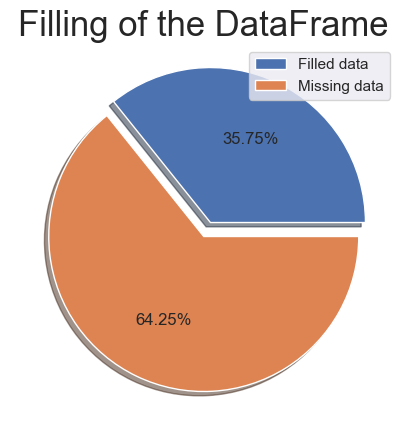

In [14]:
def filling_rate(df):
    
    
    
    nb_rows, nb_columns = df.shape

    nb_data = df.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df)

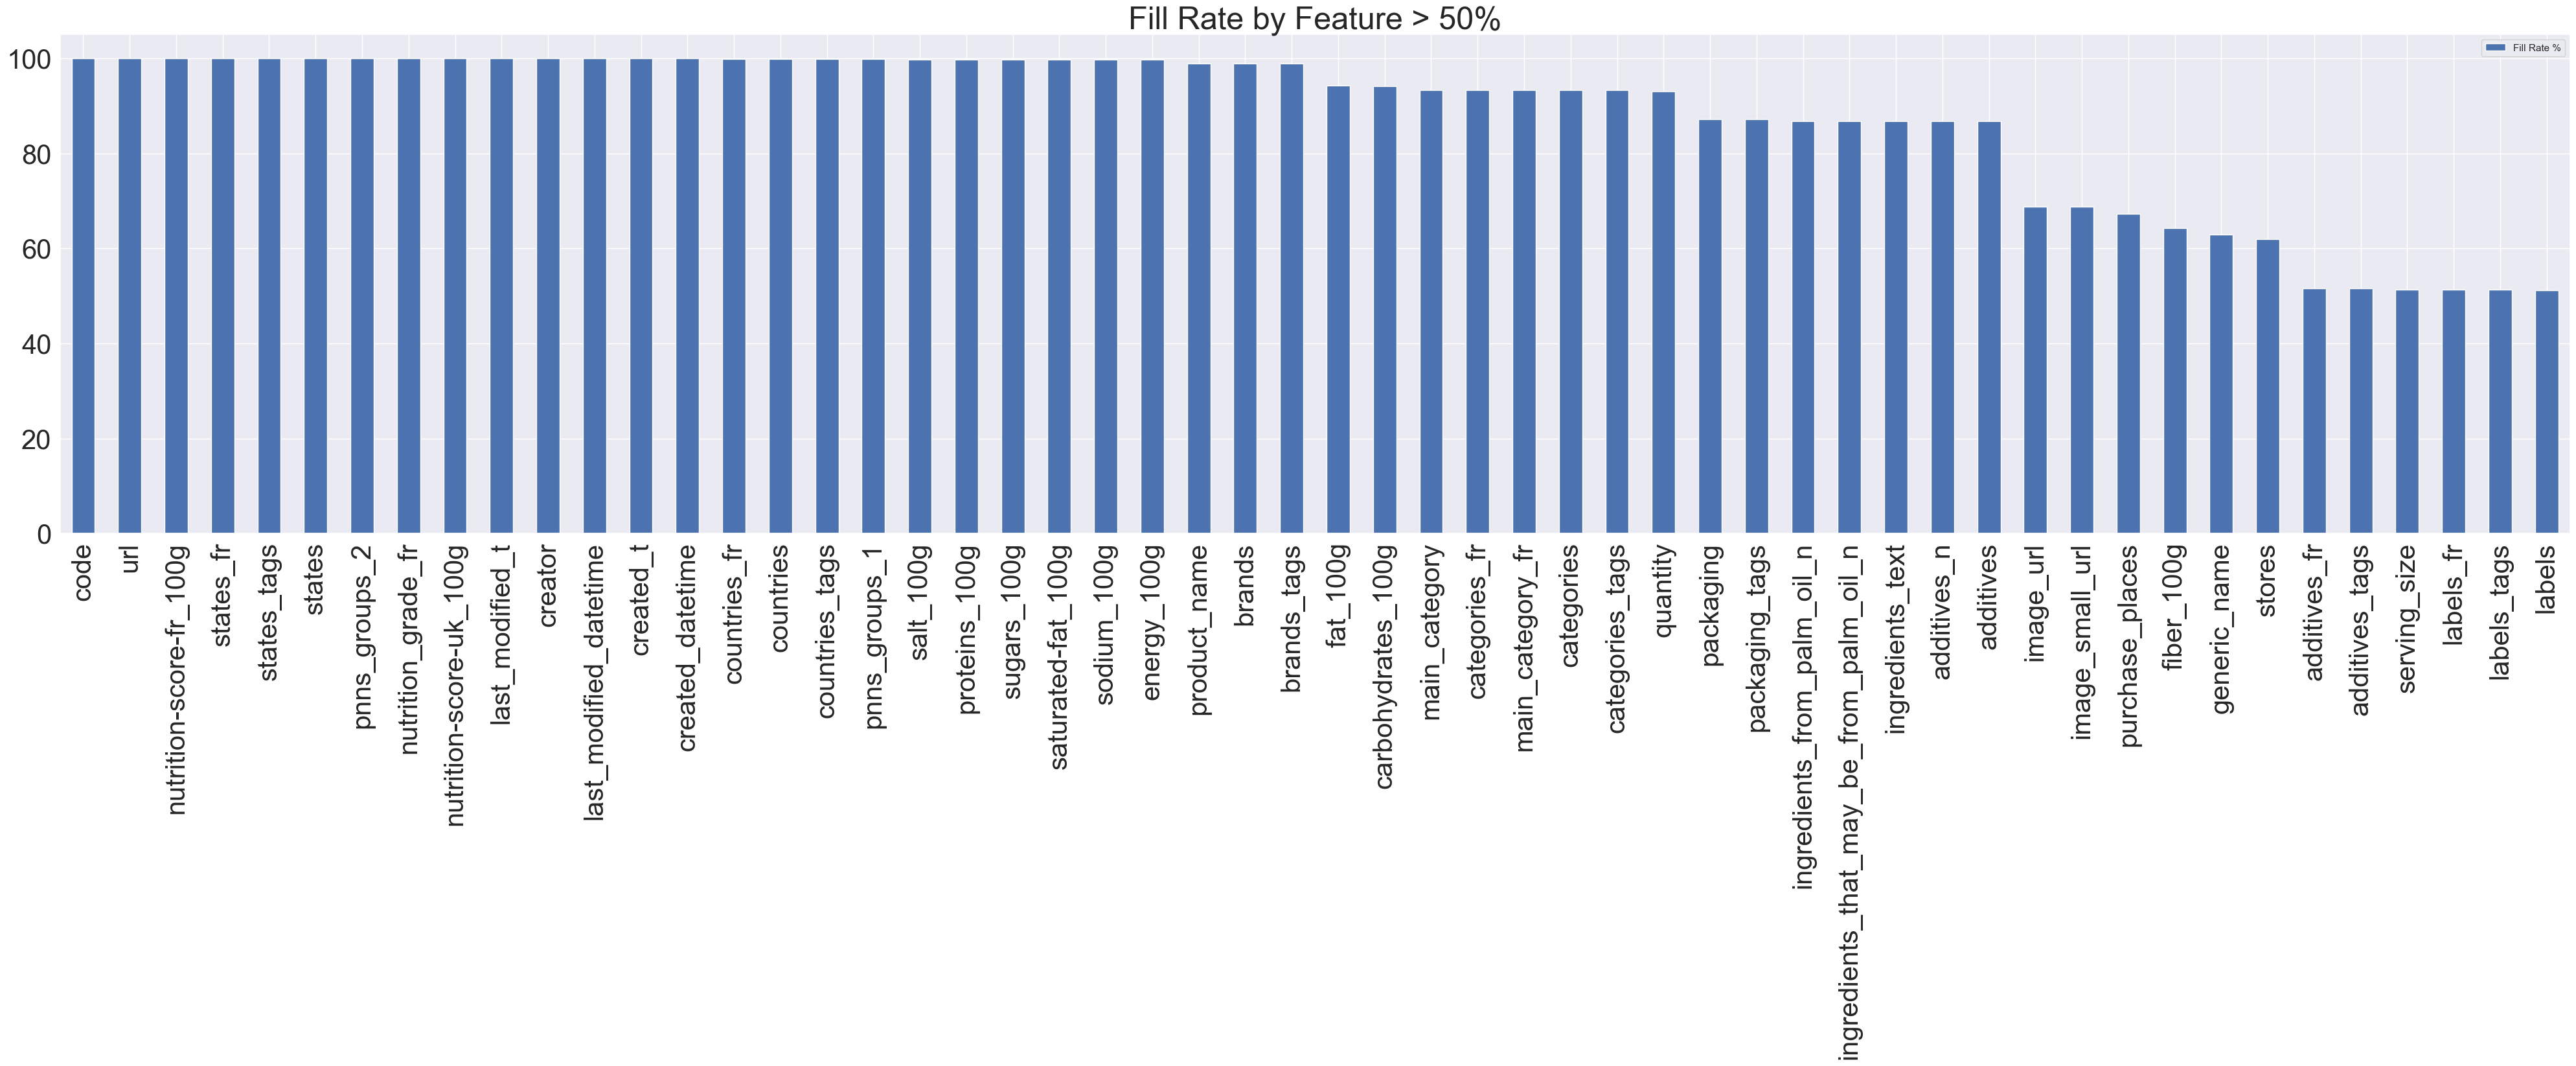

In [15]:
df_fill=round(100*df.notna().sum()/len(df),2).to_frame()
df_fill.columns=['Fill Rate %']

df_fill=df_fill[df_fill['Fill Rate %']>50]
df_fill.sort_values(by=['Fill Rate %'],ascending=False).plot.bar(figsize=(50,10),fontsize=30)
plt.title('Fill Rate by Feature > 50%',fontsize=35)
print("");

### CREATION D'UN NOUVEAU DATAFRAME EN LIEN AVEC LA PROBLEMATIQUE CHOISIE
### LES QUANTITES DE SUCRE ,DE SEL ET DE MAUVAIS GRAS TROP ELEVEES SONT A CONNAITRE LORSQU'ON A DES PROBLEMES DE SANTE ON LES TROUVE FACILEMENT INDIQUE SAUF DANS LES RAYONS TRAITEUR LORSQUE LES PRODUITS SONT TRANSFORMES SUR PLACE

In [16]:
df_prob= df[['code','main_category_fr', 'categories_fr','countries_fr', 'fat_100g','saturated-fat_100g','monounsaturated-fat_100g','polyunsaturated-fat_100g','trans-fat_100g','cholesterol_100g','salt_100g', 'sodium_100g','chloride_100g', 'carbohydrates_100g', 'sugars_100g', 'product_name' ,'nutrition-score-fr_100g','nutrition_grade_fr', 'pnns_groups_2']]
df_prob

code main_category_fr  \
106             36252              NaN   
174            290616    Légumes frais   
180           1938067      Pâtisseries   
181           4302544         Boulange   
185           8237798   Plats préparés   
...               ...              ...   
320693       96092521         Epicerie   
320702       96118580          Bonbons   
320734  9778564312457  Chips et frites   
320751  9847548283004            Pains   
320763       99111250       Thés verts   

                                            categories_fr        countries_fr  \
106                                                   NaN   France,États-Unis   
174     Aliments et boissons à base de végétaux,Alimen...              Canada   
180         Snacks sucrés,Biscuits et gâteaux,Pâtisseries              Canada   
181                                              Boulange              Canada   
185     Plats préparés,Pizzas tartes salées et quiches...              Canada   
...                                                   ...                 ...   
320693                     Epicerie,Sauces,Sauces salades         Royaume-Uni   
320702        Snacks sucrés,Confiseries,Bonbons,Pastilles              France   
320734        Snacks salés,Apéritif,Chips et frites,Chips  France,Royaume-Uni   
320751  Aliments et boissons à base de végétaux,Alimen...              France   
320763  Aliments et boissons à base de végétaux,Boisso...              France   

        fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
106        20.00              12.500                       NaN   
174        12.00               7.000                       NaN   
180        10.70               2.000                      3.33   
181         1.11               0.333                       NaN   
185         6.79               2.860                       NaN   
...          ...                 ...                       ...   
320693      6.90               0.500                       NaN   
320702      1.30               1.280                       NaN   
320734       NaN               3.400                       NaN   
320751      2.80               0.600                       NaN   
320763      0.20               0.200                       NaN   

        polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  salt_100g  \
106                          NaN             NaN           0.01200    0.09652   
174                          NaN             NaN           0.05600    2.16000   
180                         5.33           0.667           0.00533    0.64700   
181                          NaN           0.000           0.00000    1.52000   
185                          NaN           0.000           0.01070    0.49900   
...                          ...             ...               ...        ...   
320693                       NaN             NaN               NaN    0.54102   
320702                       NaN             NaN               NaN    0.00100   
320734                       NaN             NaN               NaN    1.35000   
320751                       NaN             NaN               NaN    0.68000   
320763                       NaN             NaN               NaN    0.02540   

        sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
106        0.038000            NaN               70.00       57.500   
174        0.850000            NaN               23.00        0.000   
180        0.255000            NaN               38.70       24.700   
181        0.600000            NaN               53.30        1.110   
185        0.196000            NaN                7.86        0.714   
...             ...            ...                 ...          ...   
320693     0.213000            NaN               23.10       16.700   
320702     0.000394            NaN               95.31        0.100   
320734     0.531496            NaN                 NaN        1.800   
320751     0.267717            NaN               74.80        2

In [17]:
df_prob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61911 entries, 106 to 320763
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      61911 non-null  object 
 1   main_category_fr          57780 non-null  object 
 2   categories_fr             57780 non-null  object 
 3   countries_fr              61854 non-null  object 
 4   fat_100g                  58359 non-null  float64
 5   saturated-fat_100g        61720 non-null  float64
 6   monounsaturated-fat_100g  1982 non-null   float64
 7   polyunsaturated-fat_100g  2003 non-null   float64
 8   trans-fat_100g            1730 non-null   float64
 9   cholesterol_100g          1855 non-null   float64
 10  salt_100g                 61720 non-null  float64
 11  sodium_100g               61720 non-null  float64
 12  chloride_100g             64 non-null     float64
 13  carbohydrates_100g        58301 non-null  float64
 14  sug

In [18]:
df_prob.describe()

fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
count  58359.000000        61720.000000               1982.000000   
mean      13.513264            5.339872                 14.962084   
std       17.104326            8.267179                 19.478888   
min        0.000000            0.000000                  0.000000   
25%        1.270000            0.300000                  1.727500   
50%        6.800000            1.900000                  7.000000   
75%       21.600000            7.400000                 20.800000   
max      380.000000          210.000000                 80.000000   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count               2003.000000     1730.000000       1855.000000   
mean                   7.989351        0.110636          0.019195   
std                   12.652903        0.945887          0.255252   
min                    0.000000        0.000000          0.000000   
25%                    1.200000        0.000000          0.000000   
50%                    3.000000        0.000000          0.000000   
75%                    8.965000        0.000000          0.008965   
max                   75.000000       30.300000         10.900000   

          salt_100g   sodium_100g  chloride_100g  carbohydrates_100g  \
count  61720.000000  61720.000000      64.000000        58301.000000   
mean       1.041560      0.410063       0.185805           27.918332   
std        4.171983      1.642479       0.176759           27.254186   
min        0.000000      0.000000       0.000300            0.000000   
25%        0.076200      0.030000       0.049200            4.400000   
50%        0.508000      0.200000       0.089000           14.900000   
75%        1.200000      0.472441       0.360000           53.000000   
max      297.600000    117.165354       0.589000          190.000000   

        sugars_100g  nutrition-score-fr_100g  
count  61720.000000             61911.000000  
mean      13.108402                 8.457576  
std       18.661706                 9.099277  
min       -0.100000               -15.000000  
25%        1.000000                 1.000000  
50%        4.100000                 8.000000  
75%       16.800000                15.000000  
max      134.000000                40.000000

In [19]:
df_prob.isna().sum()

code                            0
main_category_fr             4131
categories_fr                4131
countries_fr                   57
fat_100g                     3552
saturated-fat_100g            191
monounsaturated-fat_100g    59929
polyunsaturated-fat_100g    59908
trans-fat_100g              60181
cholesterol_100g            60056
salt_100g                     191
sodium_100g                   191
chloride_100g               61847
carbohydrates_100g           3610
sugars_100g                   191
product_name                  698
nutrition-score-fr_100g         0
nutrition_grade_fr              0
pnns_groups_2                   0
dtype: int64

In [20]:
for i in df_prob.columns:
    sum_nan =sum(df_prob[i].isna())
    sum_rows =len(df_prob)
    nan_percent = sum_nan/sum_rows*100
    print("percentage of nan in the feature {} is {} percent".format(i,nan_percent))

percentage of nan in the feature code is 0.0 percent
percentage of nan in the feature main_category_fr is 6.6724814653292635 percent
percentage of nan in the feature categories_fr is 6.6724814653292635 percent
percentage of nan in the feature countries_fr is 0.0920676454911082 percent
percentage of nan in the feature fat_100g is 5.73726801376169 percent
percentage of nan in the feature saturated-fat_100g is 0.30850737348774854 percent
percentage of nan in the feature monounsaturated-fat_100g is 96.7986302918706 percent
percentage of nan in the feature polyunsaturated-fat_100g is 96.76471063300545 percent
percentage of nan in the feature trans-fat_100g is 97.20566619825233 percent
percentage of nan in the feature cholesterol_100g is 97.00376346691219 percent
percentage of nan in the feature salt_100g is 0.30850737348774854 percent
percentage of nan in the feature sodium_100g is 0.30850737348774854 percent
percentage of nan in the feature chloride_100g is 99.89662580155384 percent
percen

### TEST REMPLISSAGE DU NOUVEAU DATAFRAME

The global filling rate of the DataFrame is : 72.89%


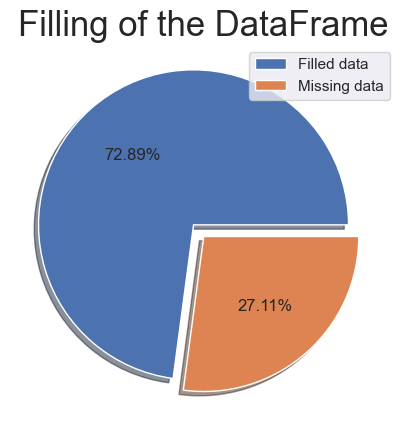

In [21]:
def filling_rate(df_prob):
    
    
    
    nb_rows, nb_columns = df_prob.shape

    nb_data = df_prob.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_prob)

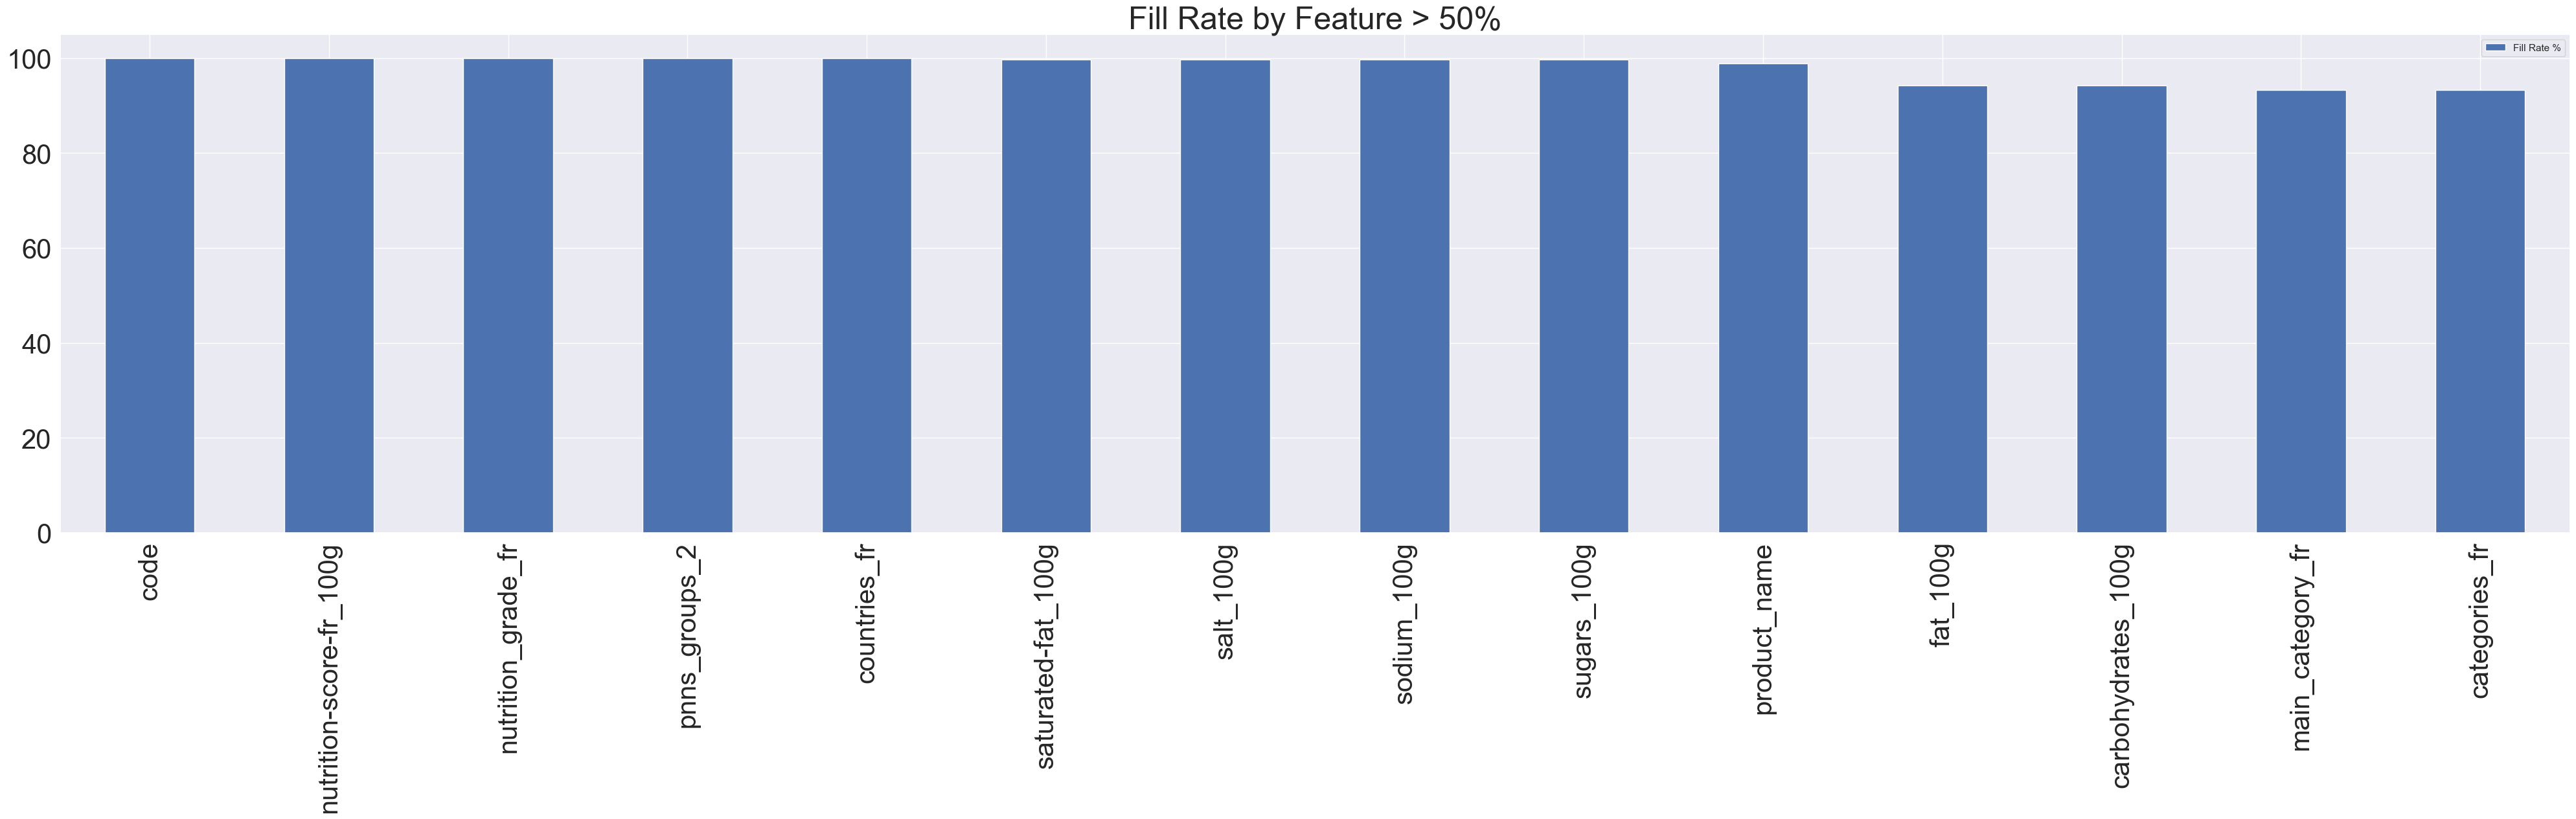

In [22]:
df_fill=round(100*df_prob.notna().sum()/len(df_prob),2).to_frame()
df_fill.columns=['Fill Rate %']

df_fill=df_fill[df_fill['Fill Rate %']>50]
df_fill.sort_values(by=['Fill Rate %'],ascending=False).plot.bar(figsize=(50,10),fontsize=30)
plt.title('Fill Rate by Feature > 50%',fontsize=35)
print("");

### CIBLAGE SUR LE PAYS FRANCE

In [23]:
df_final=df_prob[df_prob['countries_fr'] == 'France']
df_final

code  main_category_fr  \
226          40608754             Sodas   
240          87177756  Sodas aux fruits   
242                10           Gâteaux   
279                30           Gâteaux   
283                31       Pâtisseries   
...               ...               ...   
320670  9588400178181               NaN   
320681       96068779           Bonbons   
320702       96118580           Bonbons   
320751  9847548283004             Pains   
320763       99111250        Thés verts   

                                            categories_fr countries_fr  \
226     Boissons,Boissons gazeuses,Sodas,Sodas au cola...       France   
240     Aliments et boissons à base de végétaux,Boisso...       France   
242     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...       France   
279     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...       France   
283     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...       France   
...                                                   ...          ...   
320670                                                NaN       France   
320681                  Snacks sucrés,Confiseries,Bonbons       France   
320702        Snacks sucrés,Confiseries,Bonbons,Pastilles       France   
320751  Aliments et boissons à base de végétaux,Alimen...       France   
320763  Aliments et boissons à base de végétaux,Boisso...       France   

        fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
226          0.0                0.00                       NaN   
240          0.0                0.00                       NaN   
242         23.0                2.50                       NaN   
279         19.0                2.50                       NaN   
283         15.0                2.00                       NaN   
...          ...                 ...                       ...   
320670       2.1                1.20                       NaN   
320681       1.3                1.28                       NaN   
320702       1.3                1.28                       NaN   
320751       2.8                0.60                       NaN   
320763       0.2                0.20                       NaN   

        polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  salt_100g  \
226                          NaN             NaN               NaN     0.0254   
240                          NaN             NaN               NaN     0.1000   
242                          NaN             NaN               NaN     0.6600   
279                          NaN             NaN               NaN     0.6500   
283                          NaN             NaN               NaN     0.6000   
...                          ...             ...               ...        ...   
320670                       NaN             NaN               NaN     0.0600   
320681                       NaN             NaN               NaN     0.0050   
320702                       NaN             NaN               NaN     0.0010   
320751                       NaN             NaN               NaN     0.6800   
320763                       NaN             NaN               NaN     0.0254   

        sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
226        0.010000            NaN               10.40        10.40   
240        0.039370            NaN               10.40        10.40   
242        0.259843            NaN               55.00        26.00   
279        0.255906            NaN               56.00        28.00   
283        0.236220            NaN               60.00        34.00   
...             ...            ...                 ...          ...   
320670     0.023622            NaN               79.00        68.00   
320681     0.001969            NaN               95.87         0.12   
320702     0.000394            NaN               95.31         0.10   
320751     0.267717            NaN               74.80         2.60   
320763     0.010000            NaN                0.50         0

In [24]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44765 entries, 226 to 320763
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      44765 non-null  object 
 1   main_category_fr          42019 non-null  object 
 2   categories_fr             42019 non-null  object 
 3   countries_fr              44765 non-null  object 
 4   fat_100g                  41369 non-null  float64
 5   saturated-fat_100g        44693 non-null  float64
 6   monounsaturated-fat_100g  999 non-null    float64
 7   polyunsaturated-fat_100g  1029 non-null   float64
 8   trans-fat_100g            191 non-null    float64
 9   cholesterol_100g          207 non-null    float64
 10  salt_100g                 44693 non-null  float64
 11  sodium_100g               44693 non-null  float64
 12  chloride_100g             49 non-null     float64
 13  carbohydrates_100g        41318 non-null  float64
 14  sug

In [25]:
df_final.describe()


fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
count  41369.000000        44693.000000                999.000000   
mean      13.267486            5.245819                 18.239590   
std       16.822583            8.163856                 21.780417   
min        0.000000            0.000000                  0.000000   
25%        1.400000            0.300000                  2.580000   
50%        6.900000            1.900000                  8.500000   
75%       21.000000            7.100000                 26.000000   
max      380.000000          210.000000                 80.000000   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count               1029.000000      191.000000         207.00000   
mean                   9.787197        0.254890           0.06561   
std                   14.782459        0.594784           0.75744   
min                    0.000000        0.000000           0.00000   
25%                    1.500000        0.000000           0.00000   
50%                    3.400000        0.040000           0.00000   
75%                   11.500000        0.300000           0.00250   
max                   75.000000        7.140000          10.90000   

          salt_100g   sodium_100g  chloride_100g  carbohydrates_100g  \
count  44693.000000  44693.000000      49.000000        41318.000000   
mean       1.016817      0.400322       0.204236           27.320546   
std        3.496104      1.376346       0.176738           27.170352   
min        0.000000      0.000000       0.000300            0.000000   
25%        0.080000      0.031496       0.050000            4.000000   
50%        0.584200      0.230000       0.093000           14.100000   
75%        1.250000      0.492126       0.372000           52.500000   
max      211.000000     83.000000       0.531000          190.000000   

        sugars_100g  nutrition-score-fr_100g  
count  44693.000000             44765.000000  
mean      12.680580                 8.385234  
std       18.458339                 8.993129  
min       -0.100000               -15.000000  
25%        1.000000                 1.000000  
50%        3.800000                 8.000000  
75%       15.800000                15.000000  
max      104.000000                40.000000

In [26]:
df_final.isna().sum()


code                            0
main_category_fr             2746
categories_fr                2746
countries_fr                    0
fat_100g                     3396
saturated-fat_100g             72
monounsaturated-fat_100g    43766
polyunsaturated-fat_100g    43736
trans-fat_100g              44574
cholesterol_100g            44558
salt_100g                      72
sodium_100g                    72
chloride_100g               44716
carbohydrates_100g           3447
sugars_100g                    72
product_name                  297
nutrition-score-fr_100g         0
nutrition_grade_fr              0
pnns_groups_2                   0
dtype: int64

In [27]:
for i in df_final.columns:
    sum_nan =sum(df_final[i].isna())
    sum_rows =len(df_final)
    nan_percent = sum_nan/sum_rows*100
    print("percentage of nan in the feature {} is {} percent".format(i,nan_percent))

percentage of nan in the feature code is 0.0 percent
percentage of nan in the feature main_category_fr is 6.134256673740646 percent
percentage of nan in the feature categories_fr is 6.134256673740646 percent
percentage of nan in the feature countries_fr is 0.0 percent
percentage of nan in the feature fat_100g is 7.5862839271752485 percent
percentage of nan in the feature saturated-fat_100g is 0.16083994191890985 percent
percentage of nan in the feature monounsaturated-fat_100g is 97.76834580587513 percent
percentage of nan in the feature polyunsaturated-fat_100g is 97.70132916340891 percent
percentage of nan in the feature trans-fat_100g is 99.57332737629845 percent
percentage of nan in the feature cholesterol_100g is 99.53758516698313 percent
percentage of nan in the feature salt_100g is 0.16083994191890985 percent
percentage of nan in the feature sodium_100g is 0.16083994191890985 percent
percentage of nan in the feature chloride_100g is 99.89053948397185 percent
percentage of nan in

The global filling rate of the DataFrame is : 72.46%


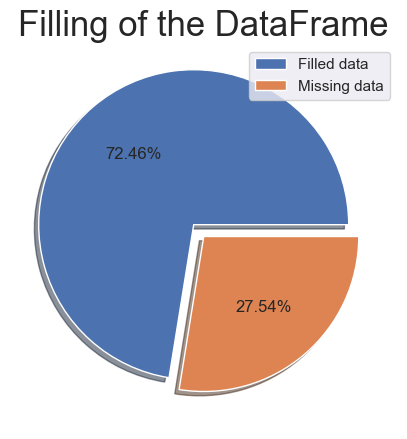

In [28]:
def filling_rate(df_final):
    
    
    
    nb_rows, nb_columns = df_final.shape

    nb_data = df_final.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_final)

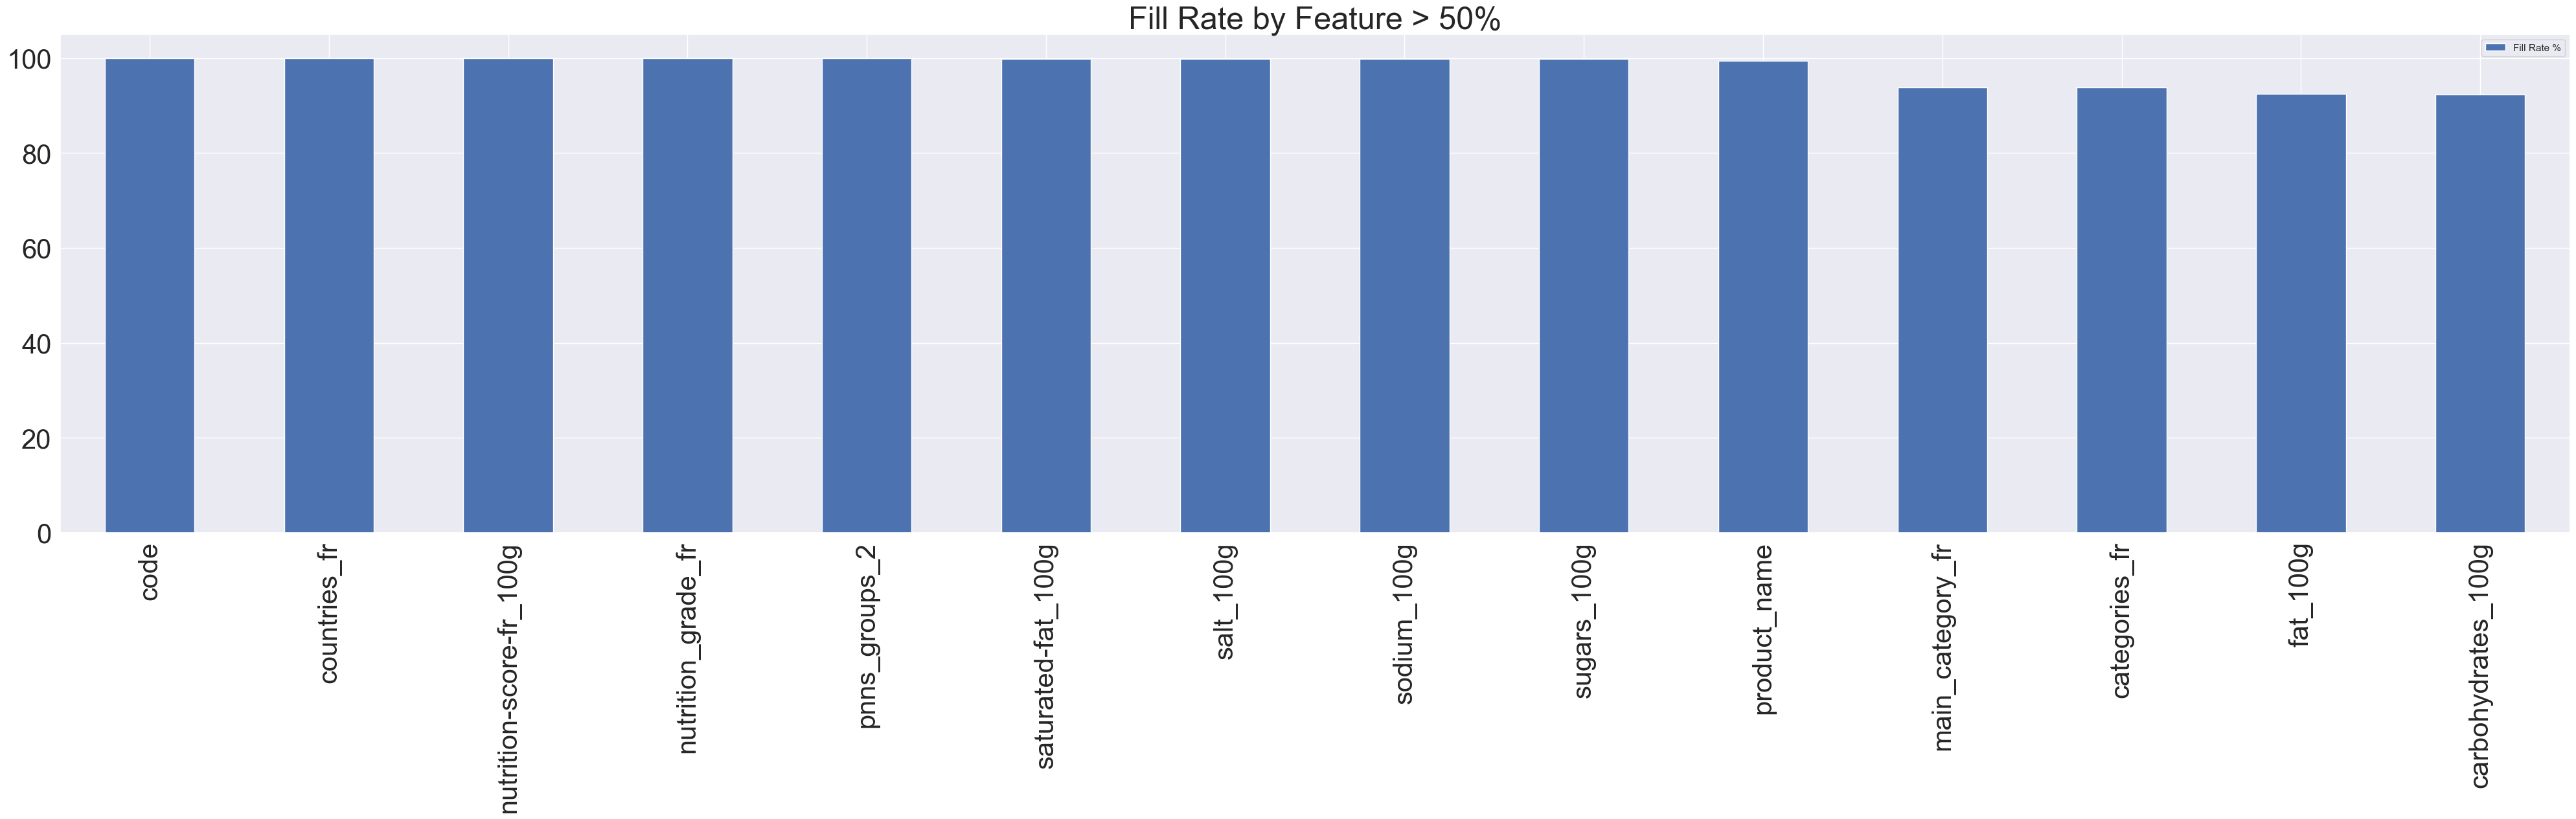

In [29]:
df_fill=round(100*df_final.notna().sum()/len(df_final),2).to_frame()
df_fill.columns=['Fill Rate %']

df_fill=df_fill[df_fill['Fill Rate %']>50]
df_fill.sort_values(by=['Fill Rate %'],ascending=False).plot.bar(figsize=(50,10),fontsize=30)
plt.title('Fill Rate by Feature > 50%',fontsize=35)
print("");

### REMPLACEMENT DES LETTRES DU NUTRISCORE PAR DES CHIFFRES

In [30]:
val_nutri = {"a":5,"b":4,"c":3,"d":2,"e":1,}

# Replace feature values with scale
df_final['nutrition_grade_fr_encoded'] = df_final['nutrition_grade_fr'].map(val_nutri)


C:\Users\emili\AppData\Local\Temp\ipykernel_17272\1780837911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['nutrition_grade_fr_encoded'] = df_final['nutrition_grade_fr'].map(val_nutri)


In [31]:
df_final

code  main_category_fr  \
226          40608754             Sodas   
240          87177756  Sodas aux fruits   
242                10           Gâteaux   
279                30           Gâteaux   
283                31       Pâtisseries   
...               ...               ...   
320670  9588400178181               NaN   
320681       96068779           Bonbons   
320702       96118580           Bonbons   
320751  9847548283004             Pains   
320763       99111250        Thés verts   

                                            categories_fr countries_fr  \
226     Boissons,Boissons gazeuses,Sodas,Sodas au cola...       France   
240     Aliments et boissons à base de végétaux,Boisso...       France   
242     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...       France   
279     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...       France   
283     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...       France   
...                                                   ...          ...   
320670                                                NaN       France   
320681                  Snacks sucrés,Confiseries,Bonbons       France   
320702        Snacks sucrés,Confiseries,Bonbons,Pastilles       France   
320751  Aliments et boissons à base de végétaux,Alimen...       France   
320763  Aliments et boissons à base de végétaux,Boisso...       France   

        fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
226          0.0                0.00                       NaN   
240          0.0                0.00                       NaN   
242         23.0                2.50                       NaN   
279         19.0                2.50                       NaN   
283         15.0                2.00                       NaN   
...          ...                 ...                       ...   
320670       2.1                1.20                       NaN   
320681       1.3                1.28                       NaN   
320702       1.3                1.28                       NaN   
320751       2.8                0.60                       NaN   
320763       0.2                0.20                       NaN   

        polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  salt_100g  \
226                          NaN             NaN               NaN     0.0254   
240                          NaN             NaN               NaN     0.1000   
242                          NaN             NaN               NaN     0.6600   
279                          NaN             NaN               NaN     0.6500   
283                          NaN             NaN               NaN     0.6000   
...                          ...             ...               ...        ...   
320670                       NaN             NaN               NaN     0.0600   
320681                       NaN             NaN               NaN     0.0050   
320702                       NaN             NaN               NaN     0.0010   
320751                       NaN             NaN               NaN     0.6800   
320763                       NaN             NaN               NaN     0.0254   

        sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
226        0.010000            NaN               10.40        10.40   
240        0.039370            NaN               10.40        10.40   
242        0.259843            NaN               55.00        26.00   
279        0.255906            NaN               56.00        28.00   
283        0.236220            NaN               60.00        34.00   
...             ...            ...                 ...          ...   
320670     0.023622            NaN               79.00        68.00   
320681     0.001969            NaN               95.87         0.12   
320702     0.000394            NaN               95.31         0.10   
320751     0.267717            NaN               74.80         2.60   
320763     0.010000            NaN                0.50         0

### CREATION DE DEUX NOUVEAUX DATAFRAMES CATEGORIEL ET NUMERIQUE

In [32]:
df_cat =df_final[['categories_fr', 'product_name', 'pnns_groups_2','nutrition_grade_fr']]
df_cat

categories_fr  \
226     Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
240     Aliments et boissons à base de végétaux,Boisso...   
242     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
279     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
283     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
...                                                   ...   
320670                                                NaN   
320681                  Snacks sucrés,Confiseries,Bonbons   
320702        Snacks sucrés,Confiseries,Bonbons,Pastilles   
320751  Aliments et boissons à base de végétaux,Alimen...   
320763  Aliments et boissons à base de végétaux,Boisso...   

                               product_name          pnns_groups_2  \
226                   Pepsi, Nouveau goût !    Sweetened beverages   
240                                     7Up    Sweetened beverages   
242                       Madeleines nature     Biscuits and cakes   
279                           Cakes Raisins     Biscuits and cakes   
283                        Cakes aux Fruits     Biscuits and cakes   
...                                     ...                    ...   
320670                                Cacao                unknown   
320681                Spearmint sans sucres                 Sweets   
320702       Fisherman's Friend Miel-Citron                 Sweets   
320751  Tartines craquantes bio au sarrasin                  Bread   
320763                   Thé vert Earl grey  Non-sugared beverages   

       nutrition_grade_fr  
226                     e  
240                     e  
242                     d  
279                     d  
283                     d  
...                   ...  
320670                  c  
320681                  c  
320702                  b  
320751                  a  
320763                  c  

[44765 rows x 4 columns]

In [33]:
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44765 entries, 226 to 320763
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   categories_fr       42019 non-null  object
 1   product_name        44468 non-null  object
 2   pnns_groups_2       44765 non-null  object
 3   nutrition_grade_fr  44765 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [34]:
df_cat.describe()


categories_fr  \
count                                        42019   
unique                                       11066   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq                                           449   

                      product_name pnns_groups_2 nutrition_grade_fr  
count                        44468         44765              44765  
unique                       36904            40                  5  
top     Huile d'olive vierge extra       unknown                  d  
freq                            36          6862              12338

In [35]:
df_cat.isna().sum()


categories_fr         2746
product_name           297
pnns_groups_2            0
nutrition_grade_fr       0
dtype: int64

In [36]:
for i in df_cat.columns:
    sum_nan =sum(df_cat[i].isna())
    sum_rows =len(df_cat)
    nan_percent = sum_nan/sum_rows*100
    print("percentage of nan in the feature {} is {} percent".format(i,nan_percent))

percentage of nan in the feature categories_fr is 6.134256673740646 percent
percentage of nan in the feature product_name is 0.6634647604155032 percent
percentage of nan in the feature pnns_groups_2 is 0.0 percent
percentage of nan in the feature nutrition_grade_fr is 0.0 percent


The global filling rate of the DataFrame is : 98.30%


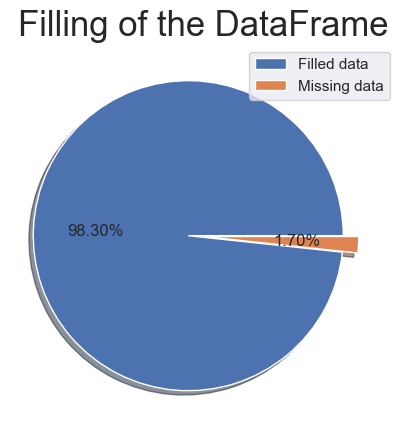

In [37]:
def filling_rate(df_cat):
    
    
    
    nb_rows, nb_columns = df_cat.shape

    nb_data = df_cat.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_cat)

In [38]:
df_num = df_final[['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr_encoded']]
df_num

fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
226          0.0                0.00                       NaN   
240          0.0                0.00                       NaN   
242         23.0                2.50                       NaN   
279         19.0                2.50                       NaN   
283         15.0                2.00                       NaN   
...          ...                 ...                       ...   
320670       2.1                1.20                       NaN   
320681       1.3                1.28                       NaN   
320702       1.3                1.28                       NaN   
320751       2.8                0.60                       NaN   
320763       0.2                0.20                       NaN   

        polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  salt_100g  \
226                          NaN             NaN               NaN     0.0254   
240                          NaN             NaN               NaN     0.1000   
242                          NaN             NaN               NaN     0.6600   
279                          NaN             NaN               NaN     0.6500   
283                          NaN             NaN               NaN     0.6000   
...                          ...             ...               ...        ...   
320670                       NaN             NaN               NaN     0.0600   
320681                       NaN             NaN               NaN     0.0050   
320702                       NaN             NaN               NaN     0.0010   
320751                       NaN             NaN               NaN     0.6800   
320763                       NaN             NaN               NaN     0.0254   

        sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
226        0.010000            NaN               10.40        10.40   
240        0.039370            NaN               10.40        10.40   
242        0.259843            NaN               55.00        26.00   
279        0.255906            NaN               56.00        28.00   
283        0.236220            NaN               60.00        34.00   
...             ...            ...                 ...          ...   
320670     0.023622            NaN               79.00        68.00   
320681     0.001969            NaN               95.87         0.12   
320702     0.000394            NaN               95.31         0.10   
320751     0.267717            NaN               74.80         2.60   
320763     0.010000            NaN                0.50         0.50   

        nutrition-score-fr_100g  nutrition_grade_fr_encoded  
226                        13.0                           1  
240                        13.0                           1  
242                        12.0                           2  
279                        13.0                           2  
283                        12.0                           2  
...                         ...                         ...  
320670                     10.0                           3  
320681                      4.0                           3  
320702                      2.0                           4  
320751                     -4.0                           5  
320763                      2.0                           3  

[44765 rows x 13 columns]

In [39]:
df_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44765 entries, 226 to 320763
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fat_100g                    41369 non-null  float64
 1   saturated-fat_100g          44693 non-null  float64
 2   monounsaturated-fat_100g    999 non-null    float64
 3   polyunsaturated-fat_100g    1029 non-null   float64
 4   trans-fat_100g              191 non-null    float64
 5   cholesterol_100g            207 non-null    float64
 6   salt_100g                   44693 non-null  float64
 7   sodium_100g                 44693 non-null  float64
 8   chloride_100g               49 non-null     float64
 9   carbohydrates_100g          41318 non-null  float64
 10  sugars_100g                 44693 non-null  float64
 11  nutrition-score-fr_100g     44765 non-null  float64
 12  nutrition_grade_fr_encoded  44765 non-null  int64  
dtypes: float64(12), int64(1)
mem

In [40]:
df_num.describe()


fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
count  41369.000000        44693.000000                999.000000   
mean      13.267486            5.245819                 18.239590   
std       16.822583            8.163856                 21.780417   
min        0.000000            0.000000                  0.000000   
25%        1.400000            0.300000                  2.580000   
50%        6.900000            1.900000                  8.500000   
75%       21.000000            7.100000                 26.000000   
max      380.000000          210.000000                 80.000000   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count               1029.000000      191.000000         207.00000   
mean                   9.787197        0.254890           0.06561   
std                   14.782459        0.594784           0.75744   
min                    0.000000        0.000000           0.00000   
25%                    1.500000        0.000000           0.00000   
50%                    3.400000        0.040000           0.00000   
75%                   11.500000        0.300000           0.00250   
max                   75.000000        7.140000          10.90000   

          salt_100g   sodium_100g  chloride_100g  carbohydrates_100g  \
count  44693.000000  44693.000000      49.000000        41318.000000   
mean       1.016817      0.400322       0.204236           27.320546   
std        3.496104      1.376346       0.176738           27.170352   
min        0.000000      0.000000       0.000300            0.000000   
25%        0.080000      0.031496       0.050000            4.000000   
50%        0.584200      0.230000       0.093000           14.100000   
75%        1.250000      0.492126       0.372000           52.500000   
max      211.000000     83.000000       0.531000          190.000000   

        sugars_100g  nutrition-score-fr_100g  nutrition_grade_fr_encoded  
count  44693.000000             44765.000000                44765.000000  
mean      12.680580                 8.385234                    2.845616  
std       18.458339                 8.993129                    1.357950  
min       -0.100000               -15.000000                    1.000000  
25%        1.000000                 1.000000                    2.000000  
50%        3.800000                 8.000000                    3.000000  
75%       15.800000                15.000000                    4.000000  
max      104.000000                40.000000                    5.000000

In [41]:
df_num.isna().sum()


fat_100g                       3396
saturated-fat_100g               72
monounsaturated-fat_100g      43766
polyunsaturated-fat_100g      43736
trans-fat_100g                44574
cholesterol_100g              44558
salt_100g                        72
sodium_100g                      72
chloride_100g                 44716
carbohydrates_100g             3447
sugars_100g                      72
nutrition-score-fr_100g           0
nutrition_grade_fr_encoded        0
dtype: int64

In [42]:
for i in df_num.columns:
    sum_nan =sum(df_num[i].isna())
    sum_rows =len(df_num)
    nan_percent = sum_nan/sum_rows*100
    print("percentage of nan in the feature {} is {} percent".format(i,nan_percent))

percentage of nan in the feature fat_100g is 7.5862839271752485 percent
percentage of nan in the feature saturated-fat_100g is 0.16083994191890985 percent
percentage of nan in the feature monounsaturated-fat_100g is 97.76834580587513 percent
percentage of nan in the feature polyunsaturated-fat_100g is 97.70132916340891 percent
percentage of nan in the feature trans-fat_100g is 99.57332737629845 percent
percentage of nan in the feature cholesterol_100g is 99.53758516698313 percent
percentage of nan in the feature salt_100g is 0.16083994191890985 percent
percentage of nan in the feature sodium_100g is 0.16083994191890985 percent
percentage of nan in the feature chloride_100g is 99.89053948397185 percent
percentage of nan in the feature carbohydrates_100g is 7.70021221936781 percent
percentage of nan in the feature sugars_100g is 0.16083994191890985 percent
percentage of nan in the feature nutrition-score-fr_100g is 0.0 percent
percentage of nan in the feature nutrition_grade_fr_encoded i

The global filling rate of the DataFrame is : 60.74%


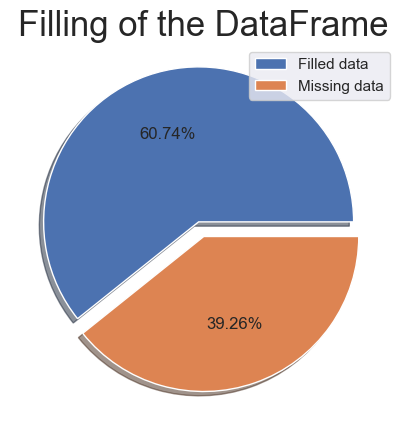

In [43]:
def filling_rate(df_num):
    
    
    
    nb_rows, nb_columns = df_num.shape

    nb_data = df_num.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_num)

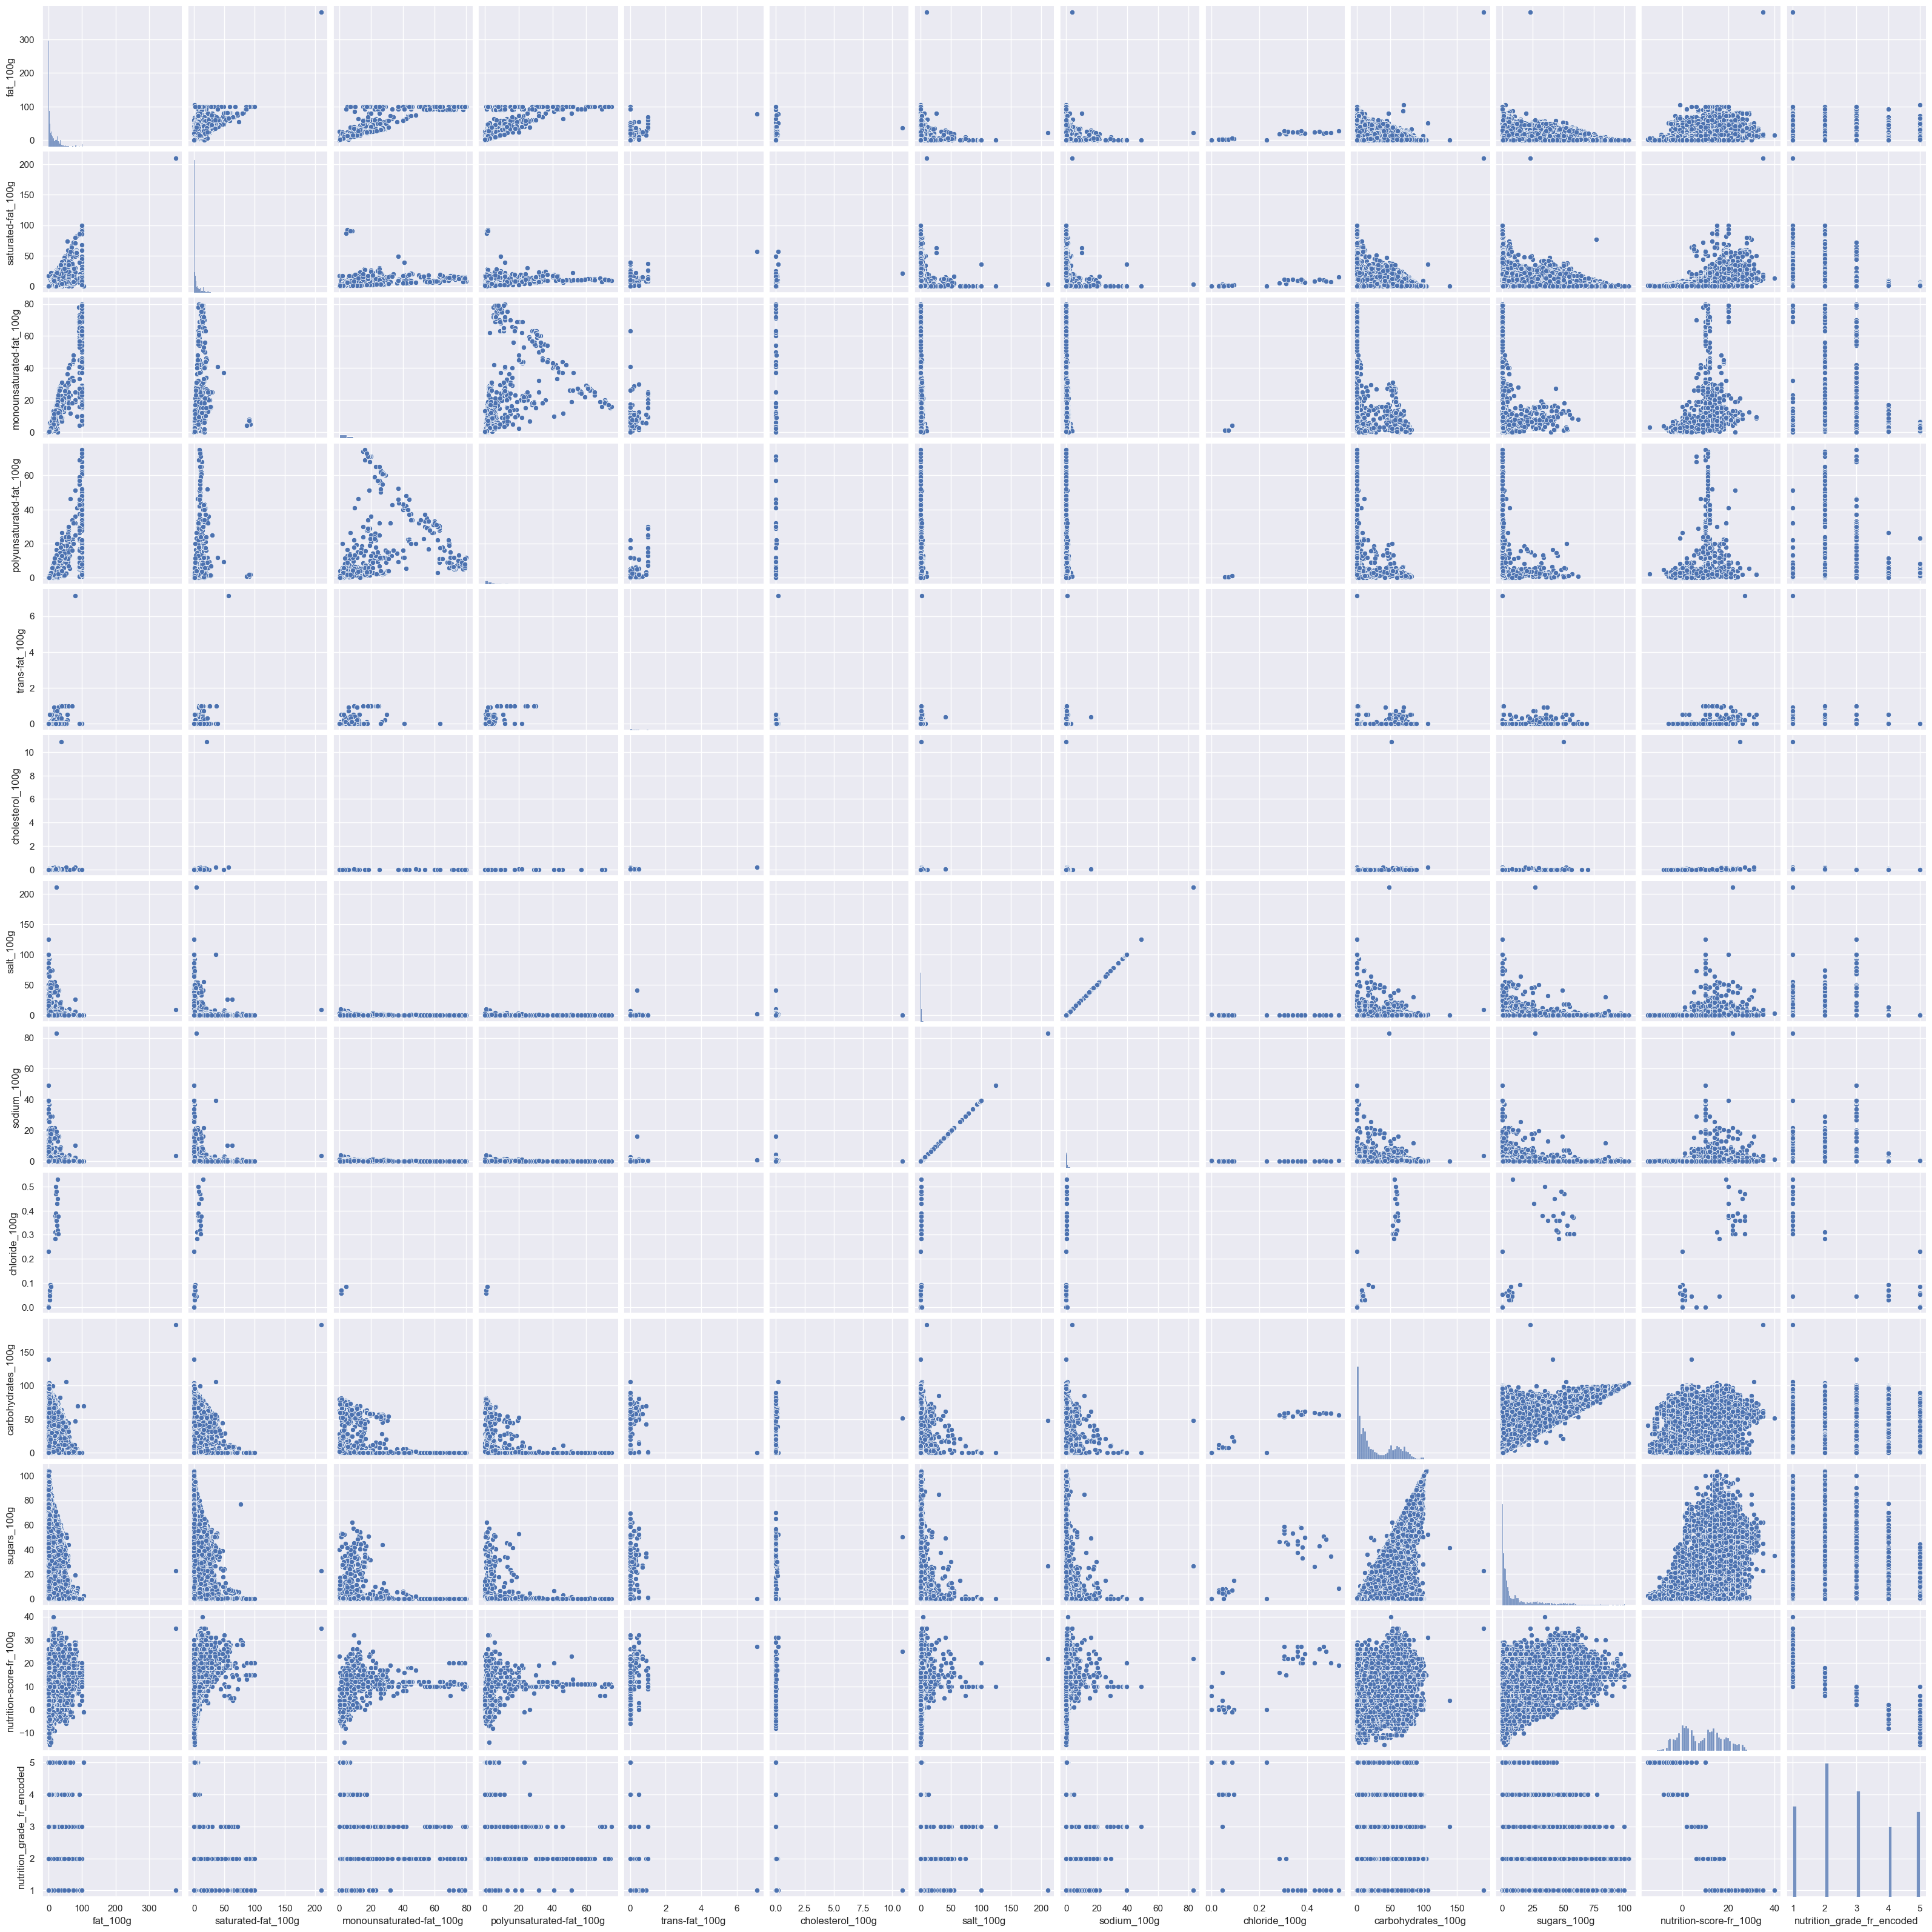

In [44]:
sns.pairplot(df_num)

### OUTLIERS

In [45]:
outlier=[_ for _ in df_final.columns if '100g' in _]

outlier100g=list(filter(lambda x: len(df_final[df_final[x]>100]), outlier))

print("Total Produits : ",len(df_final))
print("")

for comp in outlier100g:
    print("Total Produit",comp, " > 100g :",len(df_final[df_final[comp]>100]))

Total Produits :  44765

Total Produit fat_100g  > 100g : 2
Total Produit saturated-fat_100g  > 100g : 1
Total Produit salt_100g  > 100g : 2
Total Produit carbohydrates_100g  > 100g : 6
Total Produit sugars_100g  > 100g : 3


In [46]:
sup100=list(map(lambda x: df_final[df_final[x] > 100].index.to_list(),outlier100g))
sup100=[item for sublist in sup100 for item in sublist]
df_final.loc[sup100][outlier100g]

fat_100g  saturated-fat_100g  salt_100g  carbohydrates_100g  \
245311     380.0              210.00    9.33000               190.0   
305054     105.0                0.30    0.01000                70.0   
245311     380.0              210.00    9.33000               190.0   
232239      23.0                3.33  211.00000                47.8   
233372       0.0                0.00  125.00000                 0.0   
202571       0.0                0.00    0.14000               104.0   
234726      52.0               35.50    1.30048               106.0   
245311     380.0              210.00    9.33000               190.0   
260599       1.0                0.10    0.10000               103.5   
315621       0.0                0.00    0.42672               100.8   
317635       0.0                0.00    0.00000               139.0   
202571       0.0                0.00    0.14000               104.0   
260599       1.0                0.10    0.10000               103.5   
315621       0.0                0.00    0.42672               100.8   

        sugars_100g  
245311         22.7  
305054          2.5  
245311         22.7  
232239         26.7  
233372          0.0  
202571        104.0  
234726         52.0  
245311         22.7  
260599        103.5  
315621        100.8  
317635         41.5  
202571        104.0  
260599        103.5  
315621        100.8

In [47]:
outlier2=[_ for _ in df_final.columns if '100g' in _]

outlier2_100g=list(filter(lambda x: len(df_final[df_final[x]<0]), outlier2))

print("Total Produits : ",len(df_final))
print("")

for comp in outlier2_100g:
    print("Total Produit",comp, " > 100g :",len(df_final[df_final[comp]<0]))

Total Produits :  44765

Total Produit sugars_100g  > 100g : 1
Total Produit nutrition-score-fr_100g  > 100g : 7898


In [48]:
inf0=list(map(lambda x: df_final[df_final[x] <0].index.to_list(),outlier2_100g))
inf0=[item for sublist in inf0 for item in sublist]
df_final.loc[inf0][outlier100g]

fat_100g  saturated-fat_100g  salt_100g  carbohydrates_100g  \
195761      30.0               21.00   1.400000                 0.8   
789          3.8                1.40   0.600000                16.2   
12897        NaN                0.90   0.450000                 NaN   
12967        0.5                0.10   0.250000                 5.9   
19585        NaN                0.11   0.010000                 NaN   
...          ...                 ...        ...                 ...   
319578       0.0                0.00   0.021844                 2.6   
320249       0.0                0.00   0.000000                 0.0   
320494       0.0                0.00   0.010000                10.4   
320497       0.0                0.00   0.760000                 1.4   
320751       2.8                0.60   0.680000                74.8   

        sugars_100g  
195761         -0.1  
789             0.5  
12897           1.3  
12967           5.5  
19585           3.3  
...             ...  
319578          0.0  
320249          0.0  
320494          9.7  
320497          0.2  
320751          2.6  

[7899 rows x 5 columns]

### Boxplot par catégories avec outliers

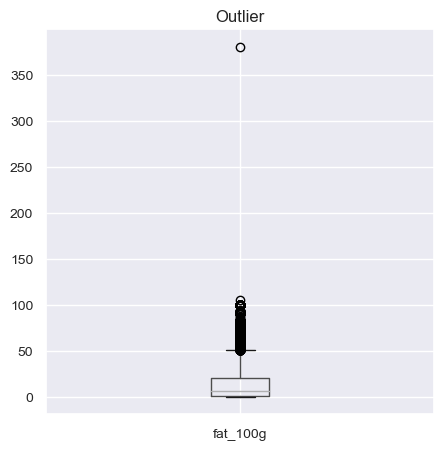

In [49]:
df_num[['fat_100g']].boxplot(figsize=(5,5))
plt.title("Outlier")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

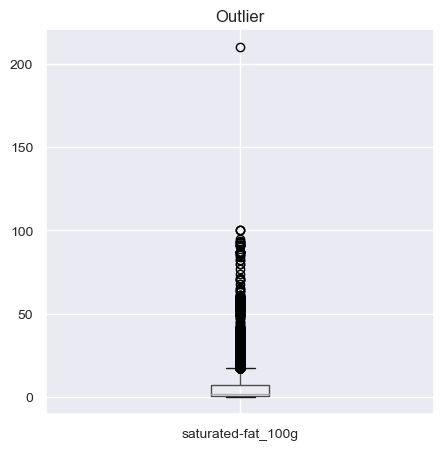

In [50]:
df_num[['saturated-fat_100g']].boxplot(figsize=(5,5))
plt.title("Outlier")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

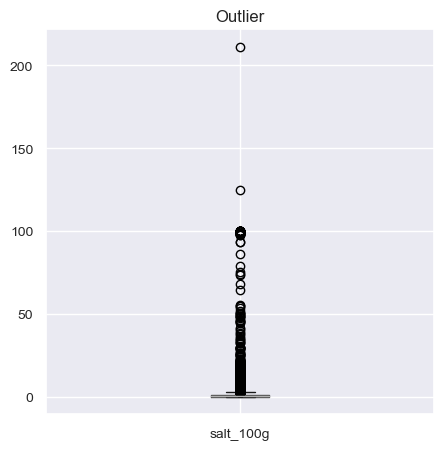

In [51]:
df_num[['salt_100g']].boxplot(figsize=(5,5))
plt.title("Outlier")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

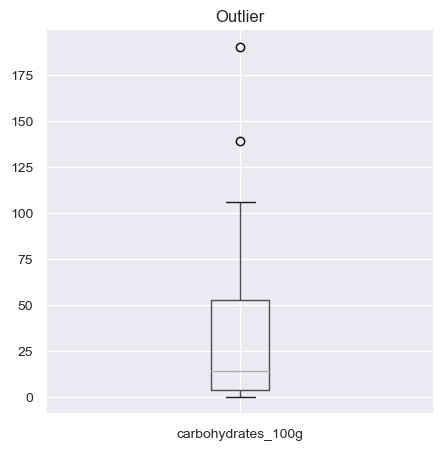

In [52]:
df_num[['carbohydrates_100g']].boxplot(figsize=(5,5))
plt.title("Outlier")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

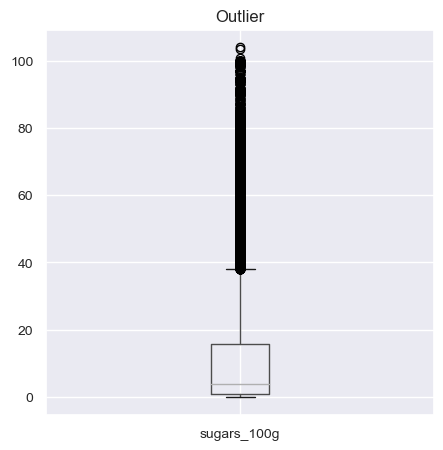

In [53]:
df_num[['sugars_100g']].boxplot(figsize=(5,5))
plt.title("Outlier")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

### SUPPRESSION VALEURS ABERRANTES <0 ET >100

In [54]:
df_final.drop(df_final[(df_final['fat_100g'] >100) & (df_final['fat_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['saturated-fat_100g'] >100) & (df_final['saturated-fat_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['monounsaturated-fat_100g'] >100) & (df_final['monounsaturated-fat_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['polyunsaturated-fat_100g'] >100) & (df_final['polyunsaturated-fat_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['trans-fat_100g'] >100) & (df_final['trans-fat_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['cholesterol_100g'] >100) & (df_final['cholesterol_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['salt_100g'] >100) & (df_final['salt_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['sodium_100g'] >100) & (df_final['sodium_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['chloride_100g'] >100) & (df_final['chloride_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['carbohydrates_100g'] >100) & (df_final['carbohydrates_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['sugars_100g'] >100) & (df_final['sugars_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['nutrition-score-fr_100g'] < 0)].index, inplace=True)
df_final.drop(df_final[(df_final['nutrition_grade_fr_encoded'] >100) & (df_final['nutrition_grade_fr_encoded'] < 0)].index, inplace=True)

C:\Users\emili\AppData\Local\Temp\ipykernel_17272\836604262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(df_final[(df_final['fat_100g'] >100) & (df_final['fat_100g'] < 0)].index, inplace=True)
C:\Users\emili\AppData\Local\Temp\ipykernel_17272\836604262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(df_final[(df_final['saturated-fat_100g'] >100) & (df_final['saturated-fat_100g'] < 0)].index, inplace=True)
C:\Users\emili\AppData\Local\Temp\ipykernel_17272\836604262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

### REMPLACEMENT DES DEUX DATAFRAMES SUITE AUX SUPPRESSIONS 

In [55]:
df_num = df_final[['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'salt_100g', 'sodium_100g', 'chloride_100g', 'carbohydrates_100g',
       'sugars_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr_encoded']]
df_num

fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
226          0.0                0.00                       NaN   
240          0.0                0.00                       NaN   
242         23.0                2.50                       NaN   
279         19.0                2.50                       NaN   
283         15.0                2.00                       NaN   
...          ...                 ...                       ...   
320668       0.5                0.00                       NaN   
320670       2.1                1.20                       NaN   
320681       1.3                1.28                       NaN   
320702       1.3                1.28                       NaN   
320763       0.2                0.20                       NaN   

        polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  salt_100g  \
226                          NaN             NaN               NaN     0.0254   
240                          NaN             NaN               NaN     0.1000   
242                          NaN             NaN               NaN     0.6600   
279                          NaN             NaN               NaN     0.6500   
283                          NaN             NaN               NaN     0.6000   
...                          ...             ...               ...        ...   
320668                       NaN             NaN               NaN     0.0300   
320670                       NaN             NaN               NaN     0.0600   
320681                       NaN             NaN               NaN     0.0050   
320702                       NaN             NaN               NaN     0.0010   
320763                       NaN             NaN               NaN     0.0254   

        sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
226        0.010000            NaN               10.40        10.40   
240        0.039370            NaN               10.40        10.40   
242        0.259843            NaN               55.00        26.00   
279        0.255906            NaN               56.00        28.00   
283        0.236220            NaN               60.00        34.00   
...             ...            ...                 ...          ...   
320668     0.011811            NaN               10.20         9.20   
320670     0.023622            NaN               79.00        68.00   
320681     0.001969            NaN               95.87         0.12   
320702     0.000394            NaN               95.31         0.10   
320763     0.010000            NaN                0.50         0.50   

        nutrition-score-fr_100g  nutrition_grade_fr_encoded  
226                        13.0                           1  
240                        13.0                           1  
242                        12.0                           2  
279                        13.0                           2  
283                        12.0                           2  
...                         ...                         ...  
320668                      4.0                           3  
320670                     10.0                           3  
320681                      4.0                           3  
320702                      2.0                           4  
320763                      2.0                           3  

[36867 rows x 13 columns]

The global filling rate of the DataFrame is : 60.70%


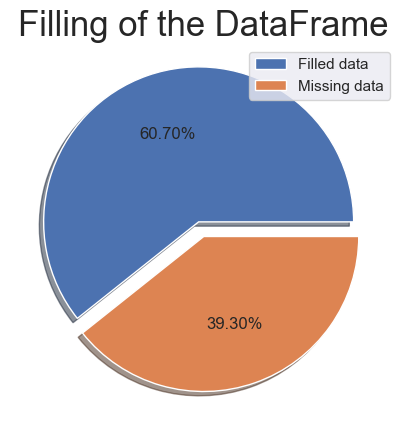

In [56]:
def filling_rate(df_num):
    
    
    
    nb_rows, nb_columns = df_num.shape

    nb_data = df_num.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_num)

In [57]:
df_cat =df_final[['categories_fr', 'product_name', 'pnns_groups_2','nutrition_grade_fr']]
df_cat

categories_fr  \
226     Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
240     Aliments et boissons à base de végétaux,Boisso...   
242     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
279     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
283     Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
...                                                   ...   
320668  Aliments et boissons à base de végétaux,Boisso...   
320670                                                NaN   
320681                  Snacks sucrés,Confiseries,Bonbons   
320702        Snacks sucrés,Confiseries,Bonbons,Pastilles   
320763  Aliments et boissons à base de végétaux,Boisso...   

                          product_name          pnns_groups_2  \
226              Pepsi, Nouveau goût !    Sweetened beverages   
240                                7Up    Sweetened beverages   
242                  Madeleines nature     Biscuits and cakes   
279                      Cakes Raisins     Biscuits and cakes   
283                   Cakes aux Fruits     Biscuits and cakes   
...                                ...                    ...   
320668         100% Pur Jus 4 agrumes            Fruit juices   
320670                           Cacao                unknown   
320681           Spearmint sans sucres                 Sweets   
320702  Fisherman's Friend Miel-Citron                 Sweets   
320763              Thé vert Earl grey  Non-sugared beverages   

       nutrition_grade_fr  
226                     e  
240                     e  
242                     d  
279                     d  
283                     d  
...                   ...  
320668                  c  
320670                  c  
320681                  c  
320702                  b  
320763                  c  

[36867 rows x 4 columns]

The global filling rate of the DataFrame is : 98.27%


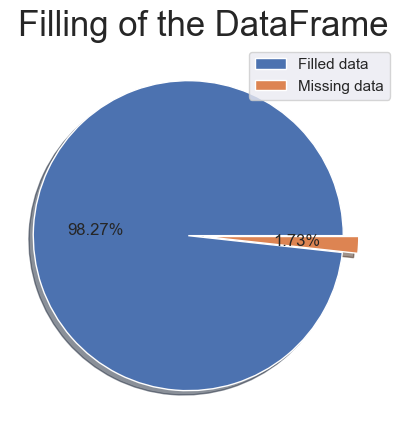

In [58]:
def filling_rate(df_cat):
    
    
    
    nb_rows, nb_columns = df_cat.shape

    nb_data = df_cat.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_cat)

### REMPLISSAGE DU DATAFRAME AVEC LES VALEURS MANQUANTES

In [59]:
#Imputation sur df_num
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed=pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [60]:
df_imputed

fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
0           0.0                0.00                      0.74   
1           0.0                0.00                      0.74   
2          23.0                2.50                     12.78   
3          19.0                2.50                      8.76   
4          15.0                2.00                      6.42   
...         ...                 ...                       ...   
36862       0.5                0.00                      0.56   
36863       2.1                1.20                      1.42   
36864       1.3                1.28                      5.24   
36865       1.3                1.28                      5.24   
36866       0.2                0.20                      1.36   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  salt_100g  \
0                          0.56           0.000          0.002880     0.0254   
1                          0.56           0.000          0.002880     0.1000   
2                          4.78           0.132          0.043580     0.6600   
3                          3.28           0.138          0.043580     0.6500   
4                          2.66           0.066          0.029698     0.6000   
...                         ...             ...               ...        ...   
36862                      0.88           0.028          0.000000     0.0300   
36863                      0.88           0.000          0.000200     0.0600   
36864                      1.98           0.026          0.016000     0.0050   
36865                      1.98           0.026          0.016000     0.0010   
36866                      0.46           0.216          0.015600     0.0254   

       sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
0         0.010000        0.04800               10.40        10.40   
1         0.039370        0.04800               10.40        10.40   
2         0.259843        0.40980               55.00        26.00   
3         0.255906        0.39620               56.00        28.00   
4         0.236220        0.38100               60.00        34.00   
...            ...            ...                 ...          ...   
36862     0.011811        0.04900               10.20         9.20   
36863     0.023622        0.34580               79.00        68.00   
36864     0.001969        0.27904               95.87         0.12   
36865     0.000394        0.27904               95.31         0.10   
36866     0.010000        0.04756                0.50         0.50   

       nutrition-score-fr_100g  nutrition_grade_fr_encoded  
0                         13.0                         1.0  
1                         13.0                         1.0  
2                         12.0                         2.0  
3                         13.0                         2.0  
4                         12.0                         2.0  
...                        ...                         ...  
36862                      4.0                         3.0  
36863                     10.0                         3.0  
36864                      4.0                         3.0  
36865                      2.0                         4.0  
36866                      2.0                         3.0  

[36867 rows x 13 columns]

In [61]:
df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fat_100g                    36867 non-null  float64
 1   saturated-fat_100g          36867 non-null  float64
 2   monounsaturated-fat_100g    36867 non-null  float64
 3   polyunsaturated-fat_100g    36867 non-null  float64
 4   trans-fat_100g              36867 non-null  float64
 5   cholesterol_100g            36867 non-null  float64
 6   salt_100g                   36867 non-null  float64
 7   sodium_100g                 36867 non-null  float64
 8   chloride_100g               36867 non-null  float64
 9   carbohydrates_100g          36867 non-null  float64
 10  sugars_100g                 36867 non-null  float64
 11  nutrition-score-fr_100g     36867 non-null  float64
 12  nutrition_grade_fr_encoded  36867 non-null  float64
dtypes: float64(13)
memory usage: 3.

In [62]:
df_imputed.describe()


fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
count  36867.000000        36867.000000              36867.000000   
mean      15.379360            6.241969                  8.646495   
std       17.642309            8.661127                 10.939089   
min        0.000000            0.000000                  0.000000   
25%        2.100000            0.500000                  1.420000   
50%        9.980000            2.800000                  4.360000   
75%       23.900000            9.200000                 11.460000   
max      380.000000          210.000000                 80.000000   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count              36867.000000    36867.000000      36867.000000   
mean                   3.462521        0.222456          0.072529   
std                    5.015156        0.270934          0.347712   
min                    0.000000        0.000000          0.000000   
25%                    1.000000        0.042000          0.002000   
50%                    2.100000        0.142000          0.012922   
75%                    3.600000        0.240000          0.026642   
max                   75.000000        7.140000         10.900000   

          salt_100g   sodium_100g  chloride_100g  carbohydrates_100g  \
count  36867.000000  36867.000000   36867.000000        36867.000000   
mean       1.159213      0.456383       0.157579           27.541178   
std        3.830075      1.507823       0.149479           27.077722   
min        0.000000      0.000000       0.000300            0.000000   
25%        0.100000      0.039370       0.043040            3.700000   
50%        0.702000      0.276378       0.054600           15.000000   
75%        1.400000      0.551181       0.330800           52.400000   
max      211.000000     83.000000       0.531000          190.000000   

        sugars_100g  nutrition-score-fr_100g  nutrition_grade_fr_encoded  
count  36867.000000             36867.000000                36867.000000  
mean      14.522342                10.995009                    2.386959  
std       19.715204                 7.641959                    1.021704  
min       -0.100000                 0.000000                    1.000000  
25%        1.000000                 4.000000                    2.000000  
50%        4.800000                11.000000                    2.000000  
75%       22.200000                17.000000                    3.000000  
max      104.000000                40.000000                    5.000000

In [63]:
df_imputed.isna().sum()


fat_100g                      0
saturated-fat_100g            0
monounsaturated-fat_100g      0
polyunsaturated-fat_100g      0
trans-fat_100g                0
cholesterol_100g              0
salt_100g                     0
sodium_100g                   0
chloride_100g                 0
carbohydrates_100g            0
sugars_100g                   0
nutrition-score-fr_100g       0
nutrition_grade_fr_encoded    0
dtype: int64

The global filling rate of the DataFrame is : 100.00%


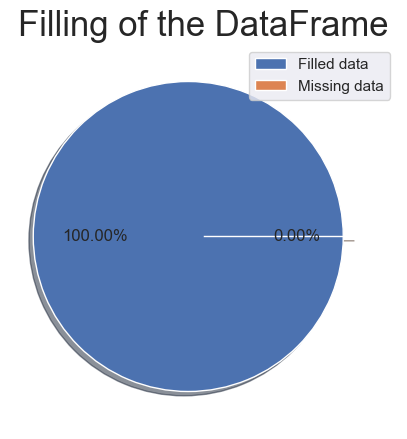

In [64]:
def filling_rate(df_imputed):
    
    
    
    nb_rows, nb_columns = df_imputed.shape

    nb_data = df_imputed.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_imputed)

### COMPLETER LE DATAFRAME CATEGORIE ET REINITIALISER L'INDEX

In [65]:
liste_column = ['categories_fr', 'product_name', 'pnns_groups_2', 'nutrition_grade_fr']

for column in liste_column : 
  df_cat[column] = df_cat[column].fillna(df_cat[column].value_counts().index[0])



C:\Users\emili\AppData\Local\Temp\ipykernel_17272\85368945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = df_cat[column].fillna(df_cat[column].value_counts().index[0])
C:\Users\emili\AppData\Local\Temp\ipykernel_17272\85368945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[column] = df_cat[column].fillna(df_cat[column].value_counts().index[0])
C:\Users\emili\AppData\Local\Temp\ipykernel_17272\85368945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [66]:
df_cat = df_cat.reset_index(drop=True)


In [67]:
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   categories_fr       36867 non-null  object
 1   product_name        36867 non-null  object
 2   pnns_groups_2       36867 non-null  object
 3   nutrition_grade_fr  36867 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [68]:
df_cat.describe()


categories_fr  \
count                                        36867   
unique                                        9190   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq                                          2749   

                      product_name pnns_groups_2 nutrition_grade_fr  
count                        36867         36867              36867  
unique                       30729            38                  5  
top     Huile d'olive vierge extra       unknown                  d  
freq                           289          5829              12338

In [69]:
df_cat.isna().sum()


categories_fr         0
product_name          0
pnns_groups_2         0
nutrition_grade_fr    0
dtype: int64

The global filling rate of the DataFrame is : 100.00%


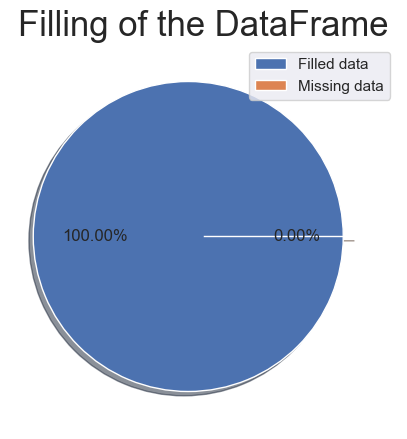

In [70]:
def filling_rate(df_cat):
    
    
    
    nb_rows, nb_columns = df_cat.shape

    nb_data = df_cat.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_cat)

### JOINTURE DES DEUX DTAFRAMES COMPLETS

In [71]:
df_complet=df_imputed.join(df_cat,lsuffix="_left",rsuffix="_right", how='left')
df_complet


fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
0           0.0                0.00                      0.74   
1           0.0                0.00                      0.74   
2          23.0                2.50                     12.78   
3          19.0                2.50                      8.76   
4          15.0                2.00                      6.42   
...         ...                 ...                       ...   
36862       0.5                0.00                      0.56   
36863       2.1                1.20                      1.42   
36864       1.3                1.28                      5.24   
36865       1.3                1.28                      5.24   
36866       0.2                0.20                      1.36   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  salt_100g  \
0                          0.56           0.000          0.002880     0.0254   
1                          0.56           0.000          0.002880     0.1000   
2                          4.78           0.132          0.043580     0.6600   
3                          3.28           0.138          0.043580     0.6500   
4                          2.66           0.066          0.029698     0.6000   
...                         ...             ...               ...        ...   
36862                      0.88           0.028          0.000000     0.0300   
36863                      0.88           0.000          0.000200     0.0600   
36864                      1.98           0.026          0.016000     0.0050   
36865                      1.98           0.026          0.016000     0.0010   
36866                      0.46           0.216          0.015600     0.0254   

       sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
0         0.010000        0.04800               10.40        10.40   
1         0.039370        0.04800               10.40        10.40   
2         0.259843        0.40980               55.00        26.00   
3         0.255906        0.39620               56.00        28.00   
4         0.236220        0.38100               60.00        34.00   
...            ...            ...                 ...          ...   
36862     0.011811        0.04900               10.20         9.20   
36863     0.023622        0.34580               79.00        68.00   
36864     0.001969        0.27904               95.87         0.12   
36865     0.000394        0.27904               95.31         0.10   
36866     0.010000        0.04756                0.50         0.50   

       nutrition-score-fr_100g  nutrition_grade_fr_encoded  \
0                         13.0                         1.0   
1                         13.0                         1.0   
2                         12.0                         2.0   
3                         13.0                         2.0   
4                         12.0                         2.0   
...                        ...                         ...   
36862                      4.0                         3.0   
36863                     10.0                         3.0   
36864                      4.0                         3.0   
36865                      2.0                         4.0   
36866                      2.0                         3.0   

                                           categories_fr  \
0      Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
1      Aliments et boissons à base de végétaux,Boisso...   
2      Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
3      Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
4      Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
...                                                  ...   
36862  Aliments et boissons à base de végétaux,Boisso...   
36863         Snacks sucrés,Biscuits et gâteaux,Biscuits   
36864                  Snacks sucrés,Confiseries,Bonbons   
36865        Snacks sucrés,Confiseries,Bonbons,Pastilles   
36866  Aliments et 

In [72]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36867 entries, 0 to 36866
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fat_100g                    36867 non-null  float64
 1   saturated-fat_100g          36867 non-null  float64
 2   monounsaturated-fat_100g    36867 non-null  float64
 3   polyunsaturated-fat_100g    36867 non-null  float64
 4   trans-fat_100g              36867 non-null  float64
 5   cholesterol_100g            36867 non-null  float64
 6   salt_100g                   36867 non-null  float64
 7   sodium_100g                 36867 non-null  float64
 8   chloride_100g               36867 non-null  float64
 9   carbohydrates_100g          36867 non-null  float64
 10  sugars_100g                 36867 non-null  float64
 11  nutrition-score-fr_100g     36867 non-null  float64
 12  nutrition_grade_fr_encoded  36867 non-null  float64
 13  categories_fr               368

In [73]:
df_complet.describe()

fat_100g  saturated-fat_100g  monounsaturated-fat_100g  \
count  36867.000000        36867.000000              36867.000000   
mean      15.379360            6.241969                  8.646495   
std       17.642309            8.661127                 10.939089   
min        0.000000            0.000000                  0.000000   
25%        2.100000            0.500000                  1.420000   
50%        9.980000            2.800000                  4.360000   
75%       23.900000            9.200000                 11.460000   
max      380.000000          210.000000                 80.000000   

       polyunsaturated-fat_100g  trans-fat_100g  cholesterol_100g  \
count              36867.000000    36867.000000      36867.000000   
mean                   3.462521        0.222456          0.072529   
std                    5.015156        0.270934          0.347712   
min                    0.000000        0.000000          0.000000   
25%                    1.000000        0.042000          0.002000   
50%                    2.100000        0.142000          0.012922   
75%                    3.600000        0.240000          0.026642   
max                   75.000000        7.140000         10.900000   

          salt_100g   sodium_100g  chloride_100g  carbohydrates_100g  \
count  36867.000000  36867.000000   36867.000000        36867.000000   
mean       1.159213      0.456383       0.157579           27.541178   
std        3.830075      1.507823       0.149479           27.077722   
min        0.000000      0.000000       0.000300            0.000000   
25%        0.100000      0.039370       0.043040            3.700000   
50%        0.702000      0.276378       0.054600           15.000000   
75%        1.400000      0.551181       0.330800           52.400000   
max      211.000000     83.000000       0.531000          190.000000   

        sugars_100g  nutrition-score-fr_100g  nutrition_grade_fr_encoded  
count  36867.000000             36867.000000                36867.000000  
mean      14.522342                10.995009                    2.386959  
std       19.715204                 7.641959                    1.021704  
min       -0.100000                 0.000000                    1.000000  
25%        1.000000                 4.000000                    2.000000  
50%        4.800000                11.000000                    2.000000  
75%       22.200000                17.000000                    3.000000  
max      104.000000                40.000000                    5.000000

### NOUVEAU TEST DE REMPLISSAGE DU DATAFRAME CREE

The global filling rate of the DataFrame is : 100.00%


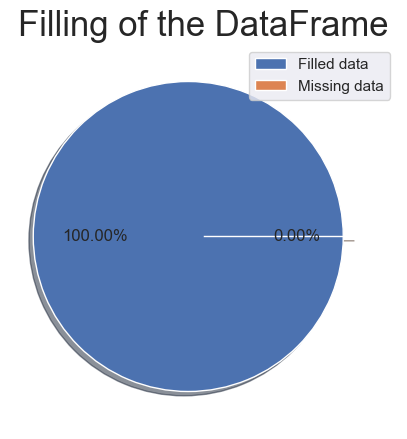

In [74]:
def filling_rate(df_complet):
    
    
    
    nb_rows, nb_columns = df_complet.shape

    nb_data = df_complet.count().sum()

    filling_rate = nb_data / (nb_rows * nb_columns)
    print("The global filling rate of the DataFrame is : {:.2%}".format(filling_rate))
      
    frequencies = [filling_rate, 1 - filling_rate]
    labels = ["Filled data", "Missing data"]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.title("Filling of the DataFrame", fontsize=25)
    ax.axis("equal")
    explode = (0.1, 0)  

    ax.pie(frequencies,
           explode=explode,
           # labels=labels,
           autopct='%1.2f%%',
           shadow=True,
          )
    plt.legend(labels)

filling_rate(df_complet)

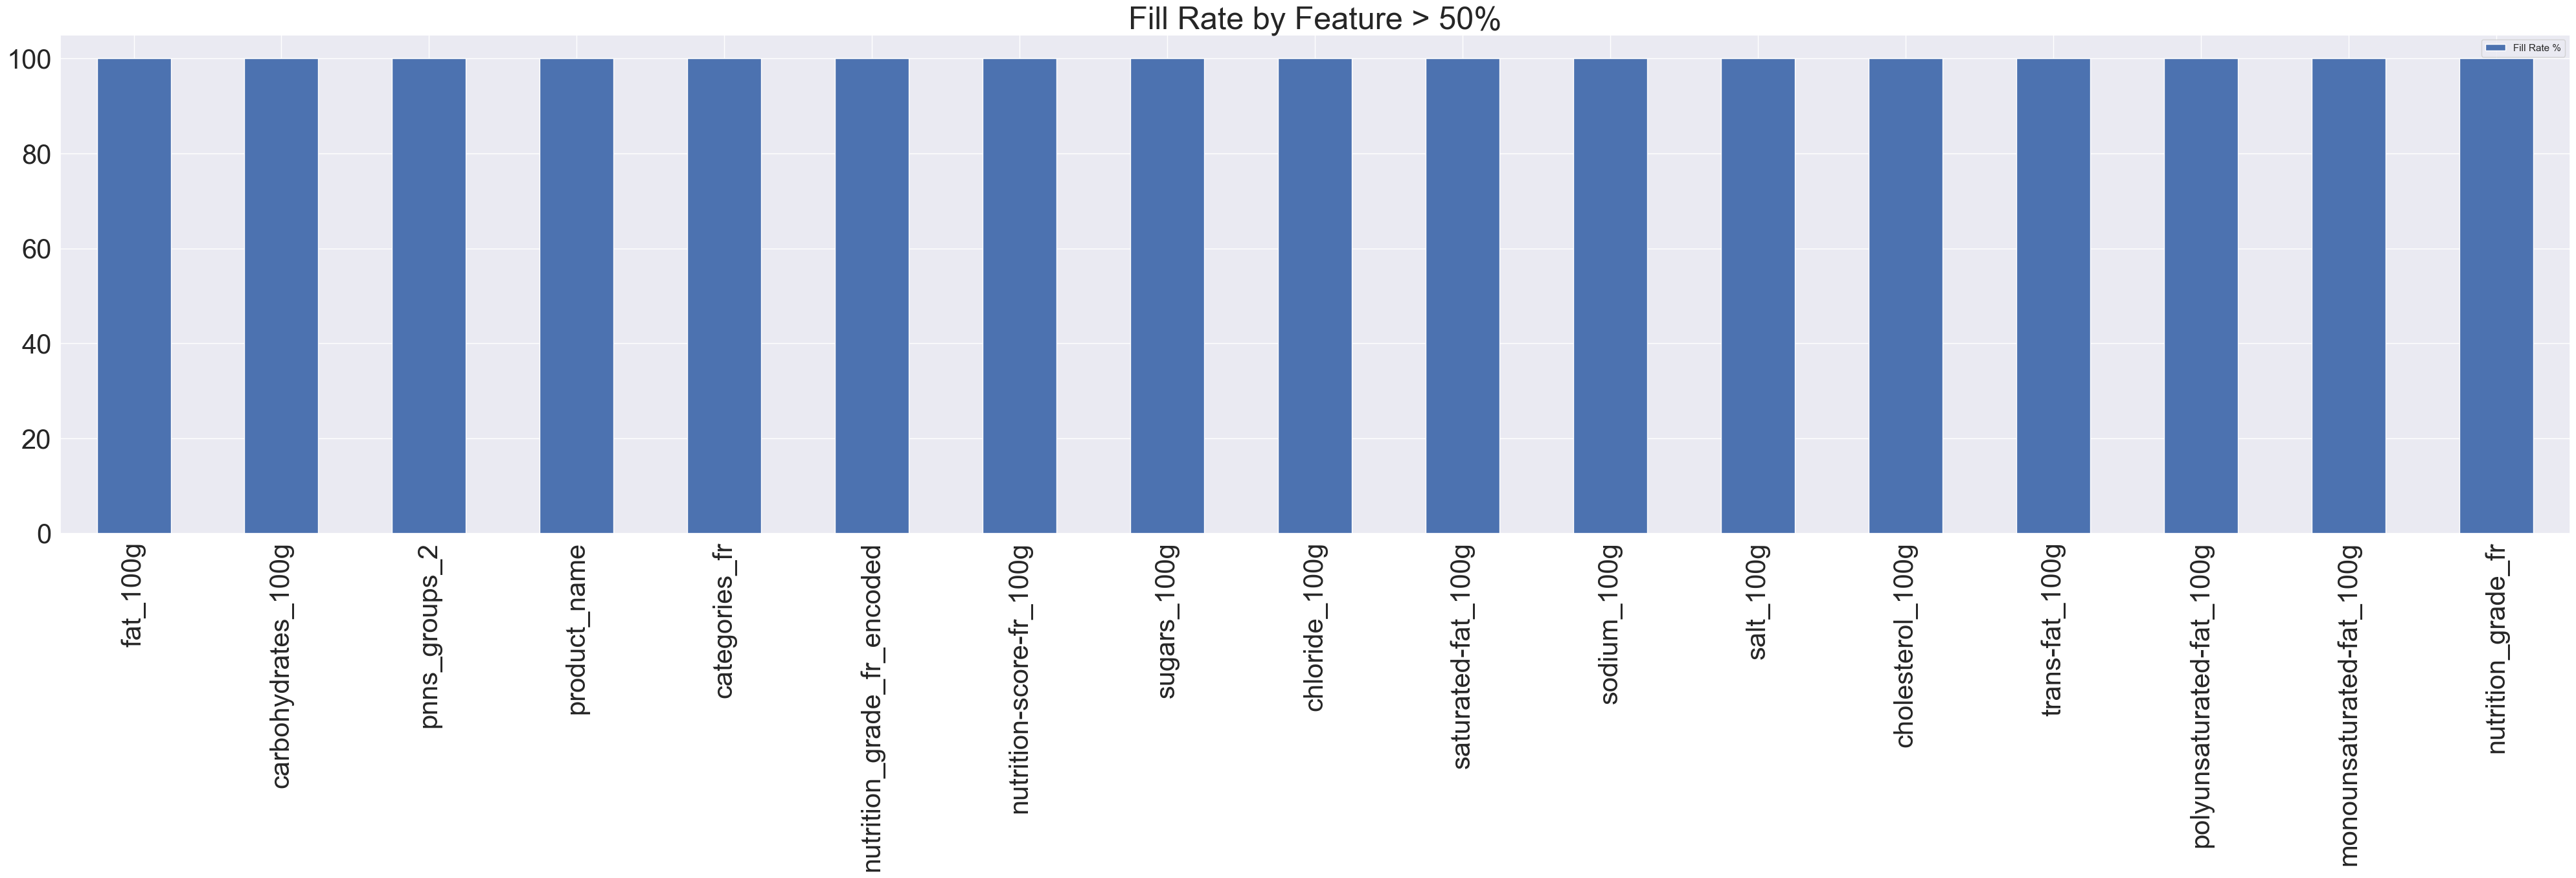

In [75]:
df_fill=round(100*df_complet.notna().sum()/len(df_complet),2).to_frame()
df_fill.columns=['Fill Rate %']

df_fill=df_fill[df_fill['Fill Rate %']>50]
df_fill.sort_values(by=['Fill Rate %'],ascending=False).plot.bar(figsize=(50,10),fontsize=30)
plt.title('Fill Rate by Feature > 50%',fontsize=35)
print("");

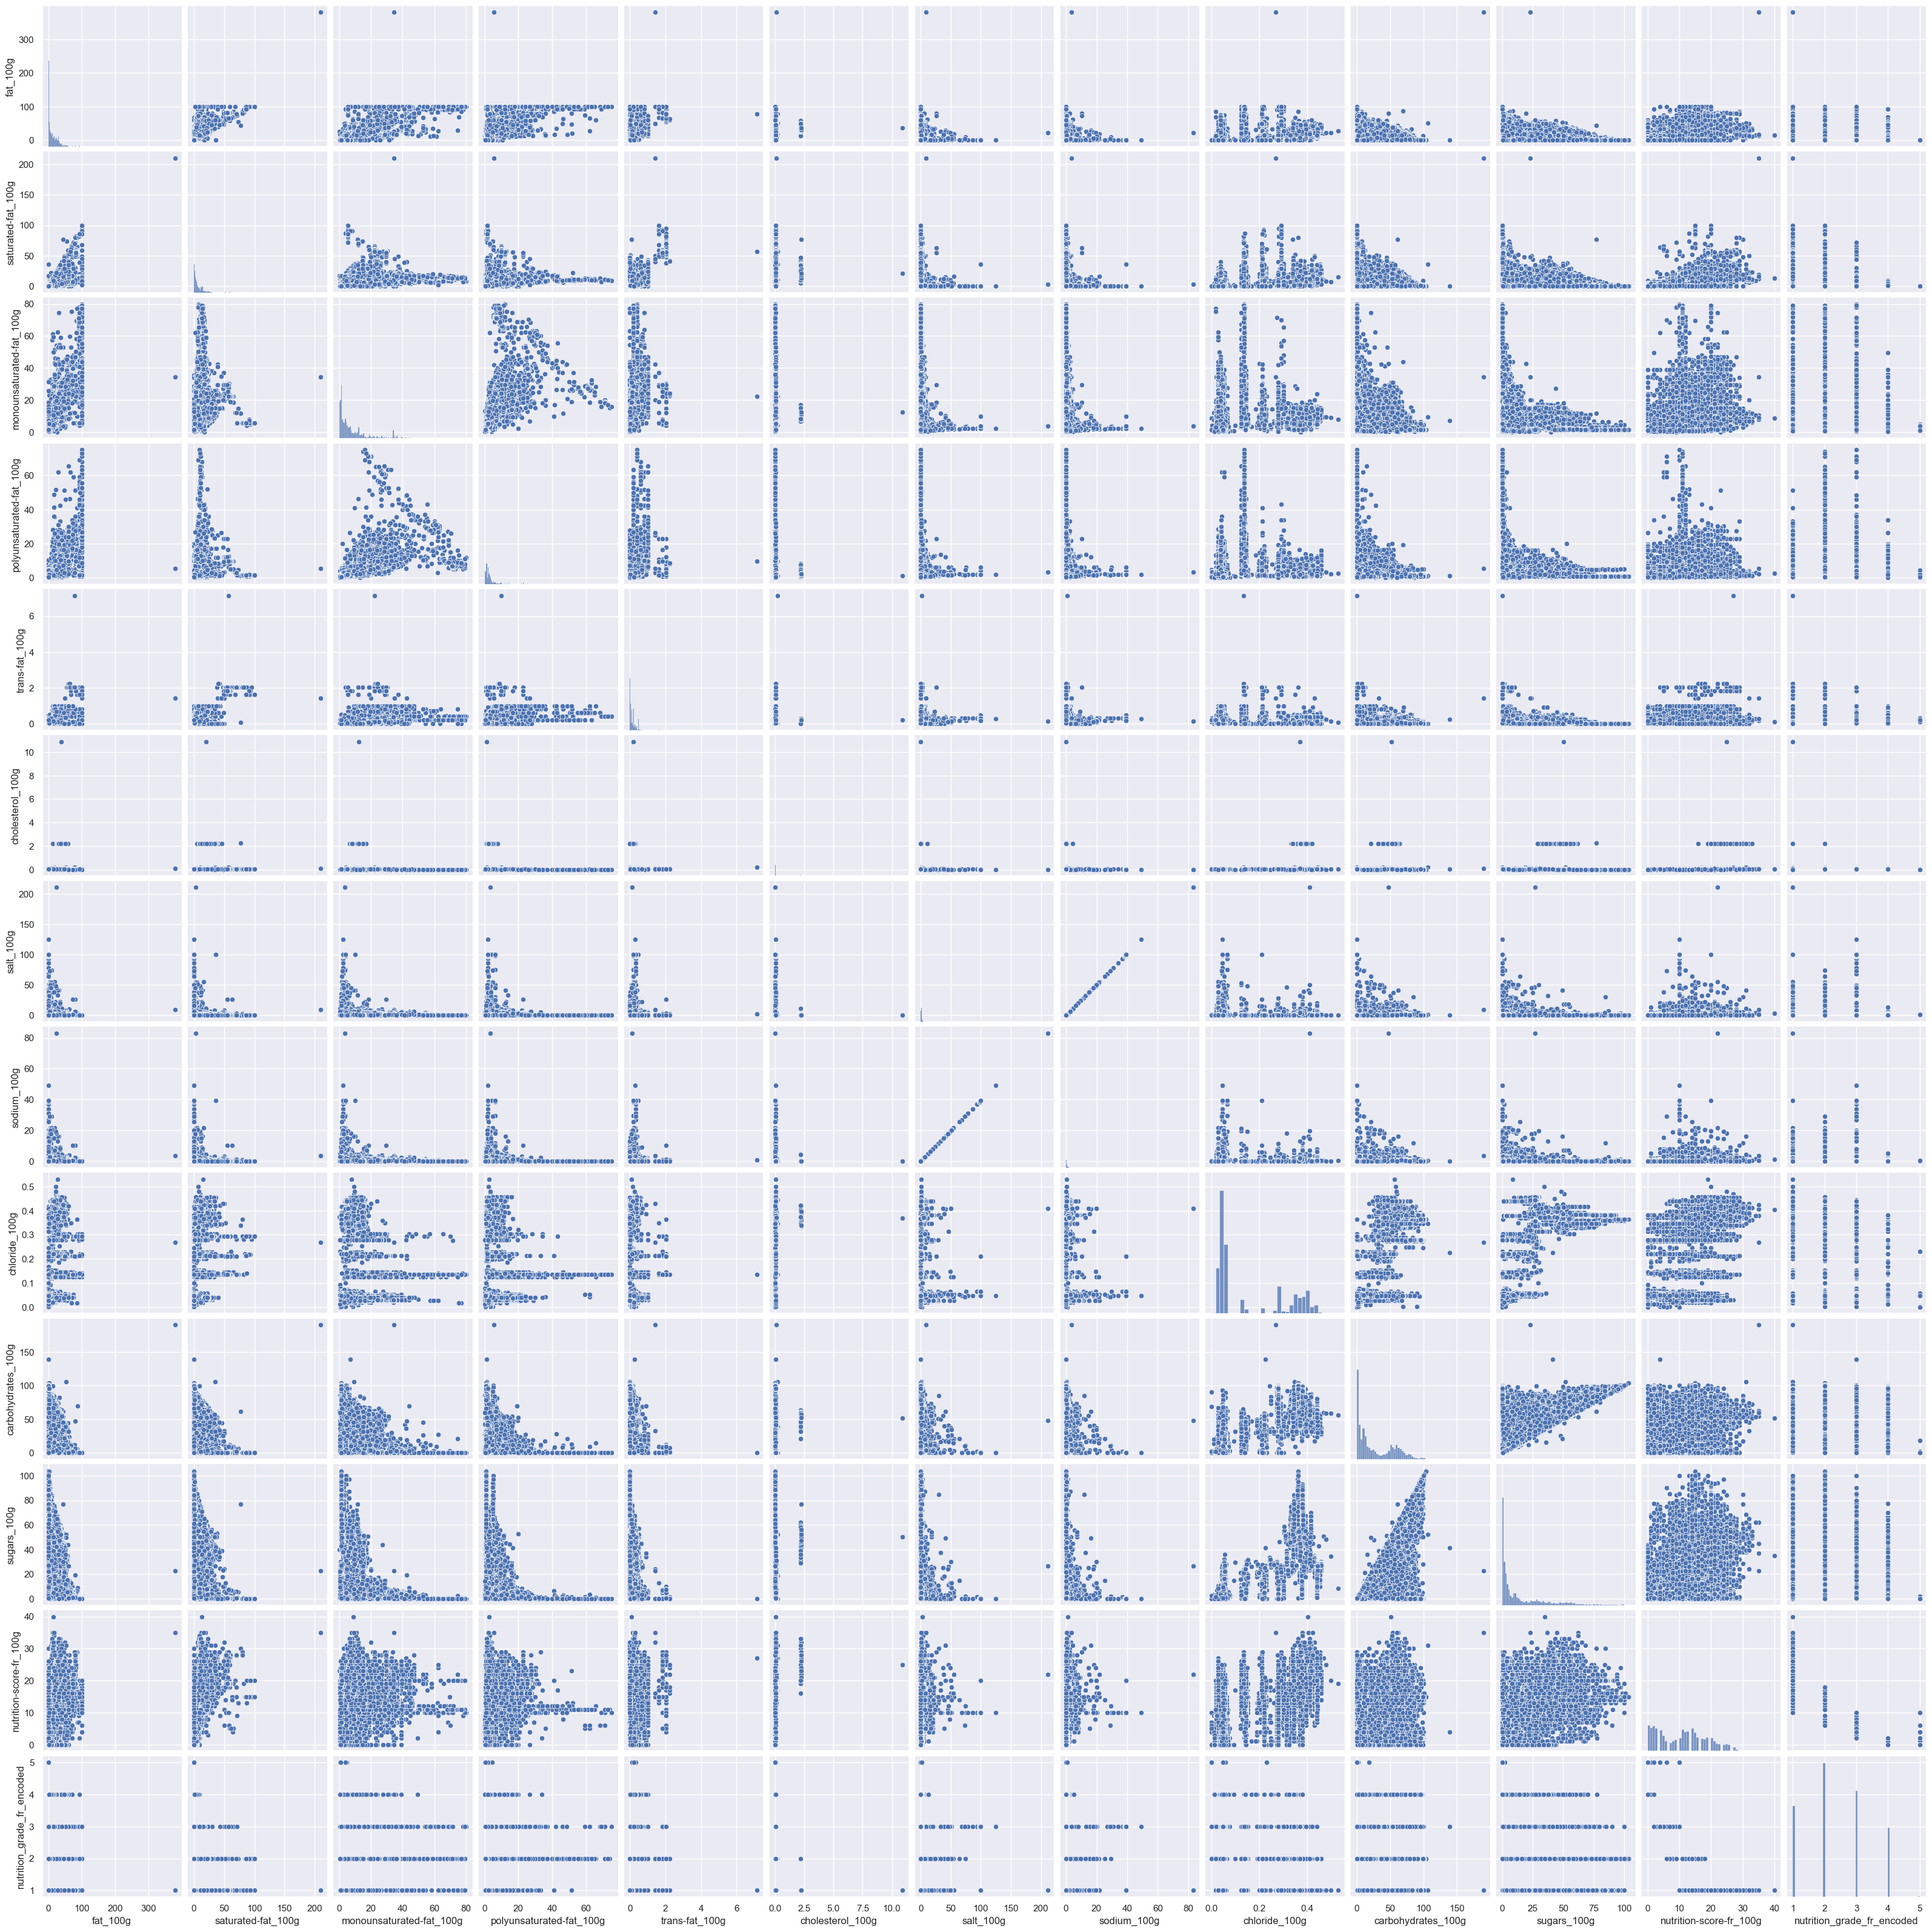

In [76]:
sns.pairplot(df_complet)

### Modification de noms de colonnes qui ne seront pas reconnues le - devenant ambigu lors de calcul

In [77]:
df_complet.rename(columns={'saturated-fat_100g': 'saturated_fat_100g', 
                           'monounsaturated-fat_100g': 'monounsaturated_fat_100g',
                   'polyunsaturated-fat_100g': 'polyunsaturated_fat_100g',
                  'trans-fat_100g': 'trans_fat_100g',
                  'nutrition-score-fr_100g': 'nutrition_score_fr_100g',
                  'monounsaturated-fat_100g': 'monounsaturated_fat_100g',}, inplace=True)
df_complet

fat_100g  saturated_fat_100g  monounsaturated_fat_100g  \
0           0.0                0.00                      0.74   
1           0.0                0.00                      0.74   
2          23.0                2.50                     12.78   
3          19.0                2.50                      8.76   
4          15.0                2.00                      6.42   
...         ...                 ...                       ...   
36862       0.5                0.00                      0.56   
36863       2.1                1.20                      1.42   
36864       1.3                1.28                      5.24   
36865       1.3                1.28                      5.24   
36866       0.2                0.20                      1.36   

       polyunsaturated_fat_100g  trans_fat_100g  cholesterol_100g  salt_100g  \
0                          0.56           0.000          0.002880     0.0254   
1                          0.56           0.000          0.002880     0.1000   
2                          4.78           0.132          0.043580     0.6600   
3                          3.28           0.138          0.043580     0.6500   
4                          2.66           0.066          0.029698     0.6000   
...                         ...             ...               ...        ...   
36862                      0.88           0.028          0.000000     0.0300   
36863                      0.88           0.000          0.000200     0.0600   
36864                      1.98           0.026          0.016000     0.0050   
36865                      1.98           0.026          0.016000     0.0010   
36866                      0.46           0.216          0.015600     0.0254   

       sodium_100g  chloride_100g  carbohydrates_100g  sugars_100g  \
0         0.010000        0.04800               10.40        10.40   
1         0.039370        0.04800               10.40        10.40   
2         0.259843        0.40980               55.00        26.00   
3         0.255906        0.39620               56.00        28.00   
4         0.236220        0.38100               60.00        34.00   
...            ...            ...                 ...          ...   
36862     0.011811        0.04900               10.20         9.20   
36863     0.023622        0.34580               79.00        68.00   
36864     0.001969        0.27904               95.87         0.12   
36865     0.000394        0.27904               95.31         0.10   
36866     0.010000        0.04756                0.50         0.50   

       nutrition_score_fr_100g  nutrition_grade_fr_encoded  \
0                         13.0                         1.0   
1                         13.0                         1.0   
2                         12.0                         2.0   
3                         13.0                         2.0   
4                         12.0                         2.0   
...                        ...                         ...   
36862                      4.0                         3.0   
36863                     10.0                         3.0   
36864                      4.0                         3.0   
36865                      2.0                         4.0   
36866                      2.0                         3.0   

                                           categories_fr  \
0      Boissons,Boissons gazeuses,Sodas,Sodas au cola...   
1      Aliments et boissons à base de végétaux,Boisso...   
2      Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
3      Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
4      Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...   
...                                                  ...   
36862  Aliments et boissons à base de végétaux,Boisso...   
36863         Snacks sucrés,Biscuits et gâteaux,Biscuits   
36864                  Snacks sucrés,Confiseries,Bonbons   
36865        Snacks sucrés,Confiseries,Bonbons,Pastilles   
36866  Aliments et 

df_complet.to_csv('df_explo.csv', index=False)